# การศึกษาความสัมพันธ์ของเกมประเภทต่างๆจากเว็บไซต์ STEAM

## รายชื่อสมาชิกในกลุ่ม: 

ชื่อ: นาย มีชัย      หนูพิศ     --- รหัสนักศึกษา:613020594-0

ชื่อ: นาย อรรถพงษ์ หลักคำ   --- รหัสนักศึกษา: 613020605-1

ชื่อ: นาย ชาคริต น้อยดวงศรี  ---รหัสนักศึกษา:613020986-3

ชื่อ: นางสาว ศศิธร วงษานุทัศน์  ---รหัสนักศึกษา:613021006-8

ชื่อ: นาย อรรถพล วงศ์สะอาด     ---  รหัสนักศึกษา:613021013-1

# **1. O - Obtaining the data (เก็บข้อมูล)**

**การเก็บข้อมูล**

เราได้ทำการนำข้อมูลมาจากเว็บไซต์ https://steamspy.com/
โดยทำการนำข้อมูลประเภทของเกม 11 ประเภท ได้แก่ 

1.Action games

2.Adventure games

3.Early Access games

4.Ex Early Access games

5.Free games

6.Massively games

7.RPG games

8.Simulation games

9.Sports games

10.Strategy games

11.Indie games

ข้อมูลเกมแต่ละประเภท เราดาวน์โหลดมาเป็นไฟล์ .xlsx (excel) แล้วนำมาเปลี่ยนเป็นไฟล์ .csv เพราะสามารถเรียกใช้ฟังก์ชันต่างๆได้ดีกว่า ไฟล์ .xlsx 

เราได้นำไฟล์ข้อมูลบันทึกลงใน google drive เพื่อง่ายต่อการเรียกใช้บน colab

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

**ทำการเชื่อมต่อ project เข้ากับ drive เพื่อเรียกใช้ไฟล์ข้อมูลต่างๆ**

**download data ได้ที่** https://drive.google.com/drive/folders/1CUD4d-ELVHyxxvfnSyNo1cm1goetJf1U?usp=sharing

In [0]:
from google.colab import drive
drive.mount('drive/')

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


# **2. S - Scrubbing / Cleaning the data (ทำความสะอาดข้อมูล หรือ Data Wrangling )**

**ทำการ ทำความสะอาดข้อมูลของเกมแต่ละประเภท**

- การเรียกใช้ data ของเกมแต่ละประเภท ดังนี้

1.Action games   : **action_games**

2.Adventure games   : **adventure_games**

3.Early Access games  : **earlyAccess_games**

4.Ex Early Access games  : **exEarlyAccess_games**
 
5.Free games    :  **free_games**

6.Massively games   : **massively_games**

7.RPG games    : **rpg_gmaes**

8.Simulation games   : **simulation_games**

9.Sports games   :  **sports_games**

10.Strategy games   :  **strategy_games**

11.Indie games : **indie_games**

**2.1Action games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df1 = pd.read_csv('/content/drive/My Drive/Info/Actiongames.csv')
df1.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,35,Dota 2,"Jul 9, 2013",Free,N/A (N/A/90%),"100,000,000 .. 200,000,000",22:54 (11:38),Valve,Valve
1,248,Counter-Strike: Global Offensive,"Aug 21, 2012",Free,N/A (N/A/83%),"100,000,000 .. 200,000,000",16:08 (05:33),"Valve, Hidden Path Entertainment",Valve
2,14,Team Fortress 2,"Oct 10, 2007",Free,N/A (N/A/92%),"50,000,000 .. 100,000,000",22:34 (10:04),Valve,Valve
3,119,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",14.99 $,N/A (N/A/86%),"50,000,000 .. 100,000,000",12:54 (04:03),PUBG Corporation,PUBG Corporation
4,63,Counter-Strike,"Nov 1, 2000",9.99 $,N/A (N/A/88%),"20,000,000 .. 50,000,000",02:41 (00:59),Valve,Valve


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
action = df1.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
action = action.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
action['Year'] = action['Release date'].str.split(',',n=1,expand = True)[1] # ทำการ split แล้วเลือกเอาปี
action['Year'] = action['Year'].replace(np.nan,0) # ทำการทแทนที่ ที่เป็นเป็นค่า NaN ด้วย 0
action['Year'] = action['Year'].astype(int) # cast type int
action.drop(action[(action['Year'] < 1999) | (action['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
action['Metascore'] = action['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))

# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
action.drop(action[action['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
action['Playtime'] = action['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
action['Owners_median'] = action['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
action['Owners_median'] = action['Owners_median']/1000000 # ทำการลดหน่วย

# ทำการแปลงและตัดค่า empty string , string , $
action['Price'] = action['Price'].replace('Free',np.nan)
action['Price'] = action['Price'].str.replace('$','')
action['Metascore'] = action['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
action['Price'] = action['Price'].astype(np.float)
action['Playtime'] = action['Playtime'].astype(float)
action['Metascore'] = action['Metascore'].astype(float)
action['Owners_median'] = action['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
action_games = action.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
action_games = action_games.fillna(0)
action_games = action_games[(action_games != 0).all(1)]


In [0]:
action_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
119,PLAYERUNKNOWN'S BATTLEGROUNDS,14.99,PUBG Corporation,PUBG Corporation,2017,86.0,12.54,75.0
63,Counter-Strike,9.99,Valve,Valve,2000,88.0,2.41,35.0
2,Grand Theft Auto V,14.99,Rockstar North,Rockstar Games,2015,96.0,11.16,15.0
4,Half-Life 2,0.99,Valve,Valve,2004,96.0,0.43,15.0
5,Portal 2,9.99,Valve,Valve,2011,95.0,4.28,15.0


**2.2Adventure games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df2 = pd.read_csv('/content/drive/My Drive/Info/Adventuregames.csv')
df2.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,54,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",14.99 $,N/A (N/A/86%),"50,000,000 .. 100,000,000",12:54 (04:03),PUBG Corporation,PUBG Corporation
1,66,Path of Exile,"Oct 23, 2013",Free,N/A (N/A/86%),"20,000,000 .. 50,000,000",19:52 (34:27),Grinding Gear Games,Grinding Gear Games
2,7102,Unturned,"Jul 7, 2017",Free,N/A (N/A),"20,000,000 .. 50,000,000",07:27 (02:40),Smartly Dressed Games,Smartly Dressed Games
3,1,Grand Theft Auto V,"Apr 14, 2015",14.99 $,N/A (N/A/96%),"10,000,000 .. 20,000,000",11:16 (03:31),Rockstar North,Rockstar Games
4,2,Portal 2,"Apr 18, 2011",9.99 $,N/A (N/A/95%),"10,000,000 .. 20,000,000",04:28 (03:30),Valve,Valve


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
adventure = df2.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
adventure = adventure.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
adventure['Year'] = adventure['Release date'].str.split(',',n=1,expand = True)[1]
adventure['Year'] = adventure['Year'].replace(np.nan,0)
adventure['Year'] = adventure['Year'].astype(int)
adventure.drop(adventure[(adventure['Year'] < 1999) | (adventure['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
adventure['Metascore'] = adventure['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
adventure.drop(adventure[adventure['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
adventure['Playtime'] = adventure['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
adventure['Owners_median'] = adventure['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
adventure['Owners_median'] = adventure['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
adventure['Price'] = adventure['Price'].replace('Free',np.nan)
adventure['Price'] = adventure['Price'].str.replace('$','')
adventure['Metascore'] = adventure['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
adventure['Price'] = adventure['Price'].astype(float)
adventure['Playtime'] = adventure['Playtime'].astype(float)
adventure['Metascore'] = adventure['Metascore'].astype(float)
adventure['Owners_median'] = adventure['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
adventure_games = adventure.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
adventure_games = adventure_games.fillna(0)
adventure_games = adventure_games[(adventure_games != 0).all(1)]

In [0]:
adventure_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
54,PLAYERUNKNOWN'S BATTLEGROUNDS,14.99,PUBG Corporation,PUBG Corporation,2017,86.0,12.54,75.0
1,Grand Theft Auto V,14.99,Rockstar North,Rockstar Games,2015,96.0,11.16,15.0
2,Portal 2,9.99,Valve,Valve,2011,95.0,4.28,15.0
117,Grim Dawn,6.24,Crate Entertainment,Crate Entertainment,2016,83.0,1.31,15.0
130,Terraria,4.99,Re-Logic,Re-Logic,2011,83.0,13.50,15.0


**2.3 Early Access games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df3 = pd.read_csv('/content/drive/My Drive/Info/EarlyAccessgames.csv')
df3.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,411,Dota Underlords,"Jun 20, 2019",Free,N/A (N/A),"5,000,000 .. 10,000,000",04:31 (02:54),Valve,Valve
1,1673,VRChat,"Feb 1, 2017",Free,N/A (N/A),"5,000,000 .. 10,000,000",06:29 (03:29),VRChat Inc.,VRChat Inc.
2,6,太吾绘卷 The Scroll Of Taiwu,"Sep 21, 2018",16.99 $,N/A (N/A),"2,000,000 .. 5,000,000",17:21 (05:47),ConchShip Games,ConchShip Games
3,522,KurtzPel,"Apr 30, 2019",Free,N/A (N/A),"2,000,000 .. 5,000,000",05:26 (03:43),KOG,KOG
4,1045,BLOCKADE 3D,"Nov 5, 2014",Free,N/A (N/A),"2,000,000 .. 5,000,000",00:00 (00:00),Novalink,Novalink


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
earlyAccess = df3.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
earlyAccess = earlyAccess.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
earlyAccess['Year'] = earlyAccess['Release date'].str.split(',',n=1,expand = True)[1]
earlyAccess['Year'] = earlyAccess['Year'].replace(np.nan,0)
earlyAccess['Year'] = earlyAccess['Year'].astype(int)
earlyAccess.drop(earlyAccess[(earlyAccess['Year'] < 1999) | (earlyAccess['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
earlyAccess['Metascore'] = earlyAccess['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
earlyAccess.drop(earlyAccess[earlyAccess['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
earlyAccess['Playtime'] = earlyAccess['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
earlyAccess['Owners_median'] = earlyAccess['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
earlyAccess['Owners_median'] = earlyAccess['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
earlyAccess['Price'] = earlyAccess['Price'].replace('Free',np.nan)
earlyAccess['Price'] = earlyAccess['Price'].str.replace('$','')
earlyAccess['Metascore'] = earlyAccess['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
earlyAccess['Price'] = earlyAccess['Price'].astype(float)
earlyAccess['Playtime'] = earlyAccess['Playtime'].astype(float)
earlyAccess['Metascore'] = earlyAccess['Metascore'].astype(float)
earlyAccess['Owners_median'] = earlyAccess['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
earlyAccess_games = earlyAccess.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)


# เนื่อจาก column Metascore ของเกมประเภท  early Access  เป็นค่า NaN ทั้งหมด เราจึงไม่ทำการลบ
#earlyAccess_games = earlyAccess_games.fillna(0)
#earlyAccess_games = earlyAccess_games[(earlyAccess_games != 0).all(1)]


In [0]:
earlyAccess_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
1673,VRChat,NaN,VRChat Inc.,VRChat Inc.,2017,NaN,6.29,7.5
6,太吾绘卷 The Scroll Of Taiwu,16.99,ConchShip Games,ConchShip Games,2018,NaN,17.21,3.5
1045,BLOCKADE 3D,NaN,Novalink,Novalink,2014,NaN,0.00,3.5
1528,Survarium,NaN,Vostok Games,Vostok Games,2015,NaN,0.39,3.5
2162,Golf With Your Friends,5.19,Blacklight Interactive,Team17 Digital Ltd,2016,NaN,1.24,3.5


**2.4 Ex Early Access games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df4 = pd.read_csv('/content/drive/My Drive/Info/ExEarlyAccessgames.csv')
df4.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Players,Playtime (Median),Developer(s),Publisher(s)
0,1,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",14.99 $,N/A (N/A/86%),"50,000,000 .. 100,000,000",19%,12:54 (04:03),PUBG Corporation,PUBG Corporation
1,2,Unturned,"Jul 7, 2017",Free,N/A (N/A),"20,000,000 .. 50,000,000",4.3%,07:27 (02:40),Smartly Dressed Games,Smartly Dressed Games
2,6,Brawlhalla,"Oct 17, 2017",Free,N/A (N/A),"10,000,000 .. 20,000,000",6%,06:05 (03:49),Blue Mammoth Games,Ubisoft
3,10,Z1 Battle Royale,"Feb 28, 2018",Free,N/A (N/A/70%),"10,000,000 .. 20,000,000",0%,77:57 (77:56),Daybreak Game Company,Daybreak Game Company
4,23,Robocraft,"Aug 24, 2017",Free,N/A (N/A),"10,000,000 .. 20,000,000",0.9%,02:51 (03:27),Freejam,Freejam


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
exEarlyAccess = df4.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
exEarlyAccess = exEarlyAccess.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
exEarlyAccess['Year'] = exEarlyAccess['Release date'].str.split(',',n=1,expand = True)[1]
exEarlyAccess['Year'] = exEarlyAccess['Year'].replace(np.nan,0)
exEarlyAccess['Year'] = exEarlyAccess['Year'].astype(int)
exEarlyAccess.drop(exEarlyAccess[(exEarlyAccess['Year'] < 1999) | (exEarlyAccess['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
exEarlyAccess['Metascore'] = exEarlyAccess['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
exEarlyAccess.drop(exEarlyAccess[exEarlyAccess['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
exEarlyAccess['Playtime'] = exEarlyAccess['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20 ปี เราโดยจะเก็บเป็น (10+20)/2
exEarlyAccess['Owners_median'] = exEarlyAccess['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
exEarlyAccess['Owners_median'] = exEarlyAccess['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
exEarlyAccess['Price'] = exEarlyAccess['Price'].replace('Free',np.nan)
exEarlyAccess['Price'] = exEarlyAccess['Price'].str.replace('$','')
exEarlyAccess['Metascore'] = exEarlyAccess['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
exEarlyAccess['Price'] = exEarlyAccess['Price'].astype(float)
exEarlyAccess['Playtime'] = exEarlyAccess['Playtime'].astype(float)
exEarlyAccess['Metascore'] = exEarlyAccess['Metascore'].astype(float)
exEarlyAccess['Owners_median'] = exEarlyAccess['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
exEarlyAccess_games = exEarlyAccess.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)','Players'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
exEarlyAccess_games = exEarlyAccess_games.fillna(0)
exEarlyAccess_games = exEarlyAccess_games[(exEarlyAccess_games != 0).all(1)]

In [0]:
exEarlyAccess_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
1,PLAYERUNKNOWN'S BATTLEGROUNDS,14.99,PUBG Corporation,PUBG Corporation,2017,86.0,12.54,75.0
342,Grim Dawn,6.24,Crate Entertainment,Crate Entertainment,2016,83.0,1.31,15.0
3,ARK: Survival Evolved,17.49,"Studio Wildcard, Instinct Games, Efecto Studio...",Studio Wildcard,2017,70.0,16.37,7.5
5,Rust,23.44,Facepunch Studios,Facepunch Studios,2018,69.0,21.02,7.5
11,Don't Starve Together,5.99,Klei Entertainment,Klei Entertainment,2016,83.0,5.44,7.5


**2.5 Free games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df5 = pd.read_csv('/content/drive/My Drive/Info/Freegames.csv')
df5.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,2,Dota 2,"Jul 9, 2013",Free,N/A (N/A/90%),"100,000,000 .. 200,000,000",22:54 (11:38),Valve,Valve
1,16,Counter-Strike: Global Offensive,"Aug 21, 2012",Free,N/A (N/A/83%),"100,000,000 .. 200,000,000",16:08 (05:33),"Valve, Hidden Path Entertainment",Valve
2,1,Team Fortress 2,"Oct 10, 2007",Free,N/A (N/A/92%),"50,000,000 .. 100,000,000",22:34 (10:04),Valve,Valve
3,8,Path of Exile,"Oct 23, 2013",Free,N/A (N/A/86%),"20,000,000 .. 50,000,000",19:52 (34:27),Grinding Gear Games,Grinding Gear Games
4,15,Paladins,"May 8, 2018",Free,N/A (N/A/83%),"20,000,000 .. 50,000,000",02:10 (01:56),Evil Mojo Games,Hi-Rez Studios


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
free = df5.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
free = free.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
free['Year'] = free['Release date'].str.split(',',n=1,expand = True)[1]
free['Year'] = free['Year'].replace(np.nan,0)
free['Year'] = free['Year'].astype(int)
free.drop(free[(free['Year'] < 1999) | (free['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
free['Metascore'] = free['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
free.drop(free[free['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
free['Playtime'] = free['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20 ปี เราโดยจะเก็บเป็น (10+20)/2
free['Owners_median'] = free['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
free['Owners_median'] = free['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
free['Price'] = free['Price'].replace('Free',np.nan)
free['Price'] = free['Price'].str.replace('$','')
free['Metascore'] = free['Metascore'].replace('',np.nan)


# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
free['Price'] = free['Price'].astype(float)
free['Playtime'] = free['Playtime'].astype(float)
free['Metascore'] = free['Metascore'].astype(float)
free['Owners_median'] = free['Owners_median'].astype(float)
free.drop(free[free.Price >0].index,inplace=True)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
free_games = free.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)



In [0]:
free_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
2,Dota 2,NaN,Valve,Valve,2013,90.0,22.54,150.0
16,Counter-Strike: Global Offensive,NaN,"Valve, Hidden Path Entertainment",Valve,2012,83.0,16.08,150.0
1,Team Fortress 2,NaN,Valve,Valve,2007,92.0,22.34,75.0
8,Path of Exile,NaN,Grinding Gear Games,Grinding Gear Games,2013,86.0,19.52,35.0
15,Paladins,NaN,Evil Mojo Games,Hi-Rez Studios,2018,83.0,2.10,35.0


**2.6 Massively games**

In [0]:
df6 = pd.read_csv('/content/drive/My Drive/Info/Massivelygames.csv')
df6.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,4,PLAYERUNKNOWN'S BATTLEGROUNDS,"Dec 21, 2017",14.99 $,N/A (N/A/86%),"50,000,000 .. 100,000,000",12:54 (04:03),PUBG Corporation,PUBG Corporation
1,3,Path of Exile,"Oct 23, 2013",Free,N/A (N/A/86%),"20,000,000 .. 50,000,000",19:52 (34:27),Grinding Gear Games,Grinding Gear Games
2,15,War Thunder,"Aug 15, 2013",Free,N/A (N/A/81%),"10,000,000 .. 20,000,000",09:45 (09:00),Gaijin Entertainment,Gaijin Entertainment
3,45,Z1 Battle Royale,"Feb 28, 2018",Free,N/A (N/A/70%),"10,000,000 .. 20,000,000",77:57 (77:56),Daybreak Game Company,Daybreak Game Company
4,60,Warface,"Jul 1, 2014",Free,N/A (N/A/62%),"10,000,000 .. 20,000,000",12:22 (09:56),MY.GAMES,MY.GAMES


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
massively = df6.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
massively = massively.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
massively['Year'] = massively['Release date'].str.split(',',n=1,expand = True)[1]
massively['Year'] = massively['Year'].replace(np.nan,0)
massively['Year'] = massively['Year'].astype(int)
massively.drop(massively[(massively['Year'] < 1999) | (massively['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
massively['Metascore'] = massively['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
massively.drop(massively[massively['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
massively['Playtime'] = massively['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
massively['Owners_median'] = massively['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
massively['Owners_median'] = massively['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
massively['Price'] = massively['Price'].replace('Free',np.nan)
massively['Price'] = massively['Price'].str.replace('$','')
massively['Metascore'] = massively['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
massively['Price'] = massively['Price'].astype(float)
massively['Playtime'] = massively['Playtime'].astype(float)
massively['Metascore'] = massively['Metascore'].astype(float)
massively['Owners_median'] = massively['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
massively_games = massively.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

In [0]:
massively_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
4,PLAYERUNKNOWN'S BATTLEGROUNDS,14.99,PUBG Corporation,PUBG Corporation,2017,86.0,12.54,75.0
3,Path of Exile,NaN,Grinding Gear Games,Grinding Gear Games,2013,86.0,19.52,35.0
15,War Thunder,NaN,Gaijin Entertainment,Gaijin Entertainment,2013,81.0,9.45,15.0
45,Z1 Battle Royale,NaN,Daybreak Game Company,Daybreak Game Company,2018,70.0,77.57,15.0
60,Warface,NaN,MY.GAMES,MY.GAMES,2014,62.0,12.22,15.0


**2.7 RPG games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df7 = pd.read_csv('/content/drive/My Drive/Info/RPGgames.csv')
df7.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,48,Path of Exile,"Oct 23, 2013",Free,N/A (N/A/86%),"20,000,000 .. 50,000,000",19:52 (34:27),Grinding Gear Games,Grinding Gear Games
1,3,The Elder Scrolls V: Skyrim,"Nov 10, 2011",19.99 $,N/A (N/A/94%),"10,000,000 .. 20,000,000",11:14 (13:53),Bethesda Game Studios,Bethesda Softworks
2,22,Borderlands 2,"Sep 17, 2012",19.99 $,N/A (N/A/89%),"10,000,000 .. 20,000,000",02:46 (00:50),"Gearbox Software, Aspyr (Mac), Aspyr (Linux)","2K, Aspyr (Mac), Aspyr (Linux)"
3,83,Grim Dawn,"Feb 25, 2016",6.24 $,N/A (N/A/83%),"10,000,000 .. 20,000,000",01:31 (00:30),Crate Entertainment,Crate Entertainment
4,89,Terraria,"May 16, 2011",4.99 $,N/A (N/A/83%),"10,000,000 .. 20,000,000",13:50 (10:29),Re-Logic,Re-Logic


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
rpg = df7.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
rpg = rpg.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
rpg['Year'] = rpg['Release date'].str.split(',',n=1,expand = True)[1]
rpg['Year'] = rpg['Year'].replace(np.nan,0)
rpg['Year'] = rpg['Year'].astype(int)
rpg.drop(rpg[(rpg['Year'] < 1999) | (rpg['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
rpg['Metascore'] = rpg['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
rpg.drop(rpg[rpg['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
rpg['Playtime'] = rpg['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
rpg['Owners_median'] = rpg['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
rpg['Owners_median'] = rpg['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
rpg['Price'] = rpg['Price'].replace('Free',np.nan)
rpg['Price'] = rpg['Price'].str.replace('$','')
rpg['Metascore'] = rpg['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
rpg['Price'] = rpg['Price'].astype(float)
rpg['Playtime'] = rpg['Playtime'].astype(float)
rpg['Metascore'] = rpg['Metascore'].astype(float)
rpg['Owners_median'] = rpg['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
rpg_games = rpg.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
rpg_games = rpg_games.fillna(0)
rpg_games = rpg_games[(rpg_games != 0).all(1)]

In [0]:
rpg_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
3,The Elder Scrolls V: Skyrim,19.99,Bethesda Game Studios,Bethesda Softworks,2011,94.0,11.14,15.0
22,Borderlands 2,19.99,"Gearbox Software, Aspyr (Mac), Aspyr (Linux)","2K, Aspyr (Mac), Aspyr (Linux)",2012,89.0,2.46,15.0
83,Grim Dawn,6.24,Crate Entertainment,Crate Entertainment,2016,83.0,1.31,15.0
89,Terraria,4.99,Re-Logic,Re-Logic,2011,83.0,13.50,15.0
174,PAYDAY 2,9.99,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,2013,79.0,16.03,15.0


**2.8 Simulation games**

In [0]:
# อ่านข้อมูลจาไฟล์ csv
df8 = pd.read_csv('/content/drive/My Drive/Info/Simulationgames.csv')
df8.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,75,War Thunder,"Aug 15, 2013",Free,N/A (N/A/81%),"10,000,000 .. 20,000,000",09:45 (09:00),Gaijin Entertainment,Gaijin Entertainment
1,1217,Street Warriors Online,"Dec 16, 2016",1.99 $,N/A (N/A),"10,000,000 .. 20,000,000",00:00 (00:00),Crazy Rocks Studios,Crazy Rocks Studios
2,4276,Garry's Mod,"Nov 29, 2006",6.69 $,N/A (N/A),"10,000,000 .. 20,000,000",08:15 (03:28),Facepunch Studios,Valve
3,5005,Robocraft,"Aug 24, 2017",Free,N/A (N/A),"10,000,000 .. 20,000,000",02:51 (03:27),Freejam,Freejam
4,27,Cities: Skylines,"Mar 10, 2015",29.99 $,N/A (N/A/85%),"5,000,000 .. 10,000,000",04:44 (03:50),Colossal Order Ltd.,Paradox Interactive


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
simulation = df8.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
simulation = simulation.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
simulation['Year'] = simulation['Release date'].str.split(',',n=1,expand = True)[1]
simulation['Year'] = simulation['Year'].replace(np.nan,0)
simulation['Year'] = simulation['Year'].astype(int)
simulation.drop(simulation[(simulation['Year'] < 1999) | (simulation['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
simulation['Metascore'] = simulation['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
simulation.drop(simulation[simulation['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
simulation['Playtime'] = simulation['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
simulation['Owners_median'] = simulation['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
simulation['Owners_median'] = simulation['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
simulation['Price'] = simulation['Price'].replace('Free',np.nan)
simulation['Price'] = simulation['Price'].str.replace('$','')
simulation['Metascore'] = simulation['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
simulation['Price'] = simulation['Price'].astype(float)
simulation['Playtime'] = simulation['Playtime'].astype(float)
simulation['Metascore'] = simulation['Metascore'].astype(float)
simulation['Owners_median'] = simulation['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
simulation_games = simulation.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
simulation_games = simulation_games.fillna(0)
simulation_games = simulation_games[(simulation_games != 0).all(1)]

In [0]:
simulation_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
27,Cities: Skylines,29.99,Colossal Order Ltd.,Paradox Interactive,2015,85.0,4.44,7.5
44,Don't Starve Together,5.99,Klei Entertainment,Klei Entertainment,2016,83.0,5.44,7.5
98,Euro Truck Simulator 2,4.99,SCS Software,SCS Software,2012,79.0,6.05,7.5
183,Black Desert Online,4.99,Pearl Abyss,Kakao Games Europe B.V.,2017,73.0,101.03,7.5
6,Stardew Valley,14.99,ConcernedApe,ConcernedApe,2016,89.0,2.00,3.5


**2.9 Sports games**

In [0]:
df9 = pd.read_csv('/content/drive/My Drive/Info/Sportsgames.csv')
df9.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,36,GRID 2,NaN,NaN,N/A (N/A/80%),"10,000,000 .. 20,000,000",00:09 (00:10),Codemasters Racing,Codemasters
1,1349,Street Warriors Online,"Dec 16, 2016",1.99 $,N/A (N/A),"10,000,000 .. 20,000,000",00:00 (00:00),Crazy Rocks Studios,Crazy Rocks Studios
2,7,Rocket League,"Jul 7, 2015",19.99 $,N/A (N/A/86%),"5,000,000 .. 10,000,000",09:51 (05:25),"Psyonix, Inc.","Psyonix, Inc."
3,851,VRChat,"Feb 1, 2017",Free,N/A (N/A),"5,000,000 .. 10,000,000",06:29 (03:29),VRChat Inc.,VRChat Inc.
4,1360,Freestyle 2: Street Basketball,"Apr 1, 2015",Free,N/A (N/A),"5,000,000 .. 10,000,000",00:12 (00:04),JOYCITY,JOYCITY


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
sports = df9.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
sports = sports.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
sports['Year'] = sports['Release date'].str.split(',',n=1,expand = True)[1]
sports['Year'] = sports['Year'].replace(np.nan,0)
sports['Year'] = sports['Year'].astype(int)
sports.drop(sports[(sports['Year'] < 1999) | (sports['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018

# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
sports['Metascore'] = sports['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
sports.drop(sports[sports['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
sports['Playtime'] = sports['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
sports['Owners_median'] = sports['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
sports['Owners_median'] = sports['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
sports['Price'] = sports['Price'].replace('Free',np.nan)
sports['Price'] = sports['Price'].str.replace('$','')
sports['Metascore'] = sports['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
sports['Price'] = sports['Price'].astype(float)
sports['Playtime'] = sports['Playtime'].astype(float)
sports['Metascore'] = sports['Metascore'].astype(float)
sports['Owners_median'] = sports['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
sports_games = sports.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
sports_games = sports_games.fillna(0)
sports_games = sports_games[(sports_games != 0).all(1)]

In [0]:
sports_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
7,Rocket League,19.99,"Psyonix, Inc.","Psyonix, Inc.",2015,86.0,9.51,7.5
14,SpeedRunners,9.89,DoubleDutch Games,tinyBuild,2016,84.0,4.02,3.5
4,NBA 2K18,59.99,Visual Concepts,2K,2017,87.0,27.16,1.5
9,DiRT Rally,39.99,"Codemasters Racing Studio, Feral Interactive (...","Codemasters, Feral Interactive (Linux), Feral ...",2015,86.0,2.17,1.5
11,Assetto Corsa,19.99,Kunos Simulazioni,Kunos Simulazioni,2014,85.0,3.30,1.5


**2.10 Strategy games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df10 = pd.read_csv('/content/drive/My Drive/Info/Strategygames.csv')
df10.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,12,Dota 2,"Jul 9, 2013",Free,N/A (N/A/90%),"100,000,000 .. 200,000,000",22:54 (11:38),Valve,Valve
1,14,Sid Meier's Civilization V,"Sep 21, 2010",29.99 $,N/A (N/A/90%),"10,000,000 .. 20,000,000",02:52 (03:49),"Firaxis Games, Aspyr (Mac), Aspyr (Linux)","2K, Aspyr (Mac), Aspyr (Linux)"
2,2316,Heroes & Generals,"Oct 18, 2016",Free,N/A (N/A),"10,000,000 .. 20,000,000",00:58 (00:56),RETO MOTO,RETO MOTO
3,53,Cities: Skylines,"Mar 10, 2015",29.99 $,N/A (N/A/85%),"5,000,000 .. 10,000,000",04:44 (03:50),Colossal Order Ltd.,Paradox Interactive
4,173,Company of Heroes 2,"Jun 25, 2013",19.99 $,N/A (N/A/80%),"5,000,000 .. 10,000,000",04:15 (03:51),"Relic Entertainment, Feral Interactive (Mac), ...","SEGA, Feral Interactive (Mac), Feral Interacti..."


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
strategy = df10.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
strategy = strategy.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
strategy['Year'] = strategy['Release date'].str.split(',',n=1,expand = True)[1]
strategy['Year'] = strategy['Year'].replace(np.nan,0)
strategy['Year'] = strategy['Year'].astype(int)
strategy.drop(strategy[(strategy['Year'] < 1999) | (strategy['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018


# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
strategy['Metascore'] = strategy['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
strategy.drop(strategy[strategy['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
strategy['Playtime'] = strategy['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
strategy['Owners_median'] = strategy['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
strategy['Owners_median'] = strategy['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
strategy['Price'] = strategy['Price'].replace('Free',np.nan)
strategy['Price'] = strategy['Price'].str.replace('$','')
strategy['Metascore'] = strategy['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
strategy['Price'] = strategy['Price'].astype(float)
strategy['Playtime'] = strategy['Playtime'].astype(float)
strategy['Metascore'] = strategy['Metascore'].astype(float)
strategy['Owners_median'] = strategy['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
strategy_games = strategy.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
strategy_games = strategy_games.fillna(0)
strategy_games = strategy_games[(strategy_games != 0).all(1)]

In [0]:
strategy_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
14,Sid Meier's Civilization V,29.99,"Firaxis Games, Aspyr (Mac), Aspyr (Linux)","2K, Aspyr (Mac), Aspyr (Linux)",2010,90.0,2.52,15.0
53,Cities: Skylines,29.99,Colossal Order Ltd.,Paradox Interactive,2015,85.0,4.44,7.5
173,Company of Heroes 2,19.99,"Relic Entertainment, Feral Interactive (Mac), ...","SEGA, Feral Interactive (Mac), Feral Interacti...",2013,80.0,4.15,7.5
414,Black Desert Online,4.99,Pearl Abyss,Kakao Games Europe B.V.,2017,73.0,101.03,7.5
570,Age of Empires II (2013),19.99,"Skybox Labs, Hidden Path Entertainment, Ensemb...",Xbox Game Studios,2013,68.0,4.48,7.5


**2.11 Indie games**

In [0]:
# อ่านข้อมูลจากไฟล์ csv
df11 = pd.read_csv('/content/drive/My Drive/Info/Indiegames.csv')
df11.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,61,Path of Exile,"Oct 23, 2013",Free,N/A (N/A/86%),"20,000,000 .. 50,000,000",09:18 (14:43),Grinding Gear Games,Grinding Gear Games
1,17383,Unturned,"Jul 7, 2017",Free,N/A (N/A),"20,000,000 .. 50,000,000",38:48 (05:04),Smartly Dressed Games,Smartly Dressed Games
2,59,Rocket League,"Jul 7, 2015",19.99 $,N/A (N/A/86%),"10,000,000 .. 20,000,000",06:43 (03:46),"Psyonix, Inc.","Psyonix, Inc."
3,145,Grim Dawn,"Feb 25, 2016",24.99 $,N/A (N/A/83%),"10,000,000 .. 20,000,000",42:17 (14:05),Crate Entertainment,Crate Entertainment
4,174,Terraria,"May 16, 2011",9.99 $,N/A (N/A/83%),"10,000,000 .. 20,000,000",09:53 (01:43),Re-Logic,Re-Logic


In [0]:
# เปลี่ยนชื่อของ column # เป็น AppId
indie = df11.rename(columns={'#':"AppId"})

# ทำการ set index โดยกำหนด column id เป็น AppId
indie = indie.set_index('AppId')

# ทำการสร้าง new column 'Year' เก็บข้อมูลปีที่เกมวางขาย
indie['Year'] = indie['Release date'].str.split(',',n=1,expand = True)[1]
indie['Year'] = indie['Year'].replace(np.nan,0)
indie['Year'] = indie['Year'].astype(int)
indie.drop(indie[(indie['Year'] < 1999) | (indie['Year'] > 2018)  ].index,inplace=True)  # เราจะเอาข้อมูลตั้งแต่ปี 1999 - 2018


# ทำการสร้าง new column 'Metascore' เก็บค่า metascore ของแต่ละเกม 
indie['Metascore'] = indie['Score rank(Userscore / Metascore)'].map(lambda x: x.lstrip('N/A (N/A/)').rstrip('%)'))
# ทำการลบข้อมูล ในบางกรณีที่ข้อมูลในของ column Metascore  มีอักขระพิเศษ เช่น '100% (95%/84'  เพราะไม่สามารถ clean data ตาม condition ของโค้ดบรรทัดด้านบนได้ 
indie.drop(indie[indie['Metascore'].map(len)>3].index,inplace=True)  # เมื่อลบแล้วจะสามารถ cast type ได้สะดวกขึ้น

# ทำการสร้าง new column 'Playtime' เก็บเวลาเฉลี่ยที่แต่ละเกมถูกเล่น หน่วย : ชั่วโมง
indie['Playtime'] = indie['Playtime (Median)'].map(lambda x : x.split('(')[0].replace(':','.'))

# ทำการสร้าง new column 'Owners_median' เก็บจำนวนผู้ที่ซื้อเกม เช่น ข้อมูลเป็น 10-20  เราโดยจะเก็บเป็น (10+20)/2
indie['Owners_median'] = indie['Owners'].map(lambda x : ( int(x.split('..')[0].replace(',','')) + int(x.split('..')[1].replace(',','')))/2 )
indie['Owners_median'] = indie['Owners_median']/1000000

# ทำการแปลงและตัดค่า empty string , string , $
indie['Price'] = indie['Price'].replace('Free',np.nan)
indie['Price'] = indie['Price'].str.replace('$','')
indie['Metascore'] = indie['Metascore'].replace('',np.nan)

# ทำการ cast type ในแต่ละ column เพื่อป้องกัน Error เมื่อจะนำข้อมูลไปใช้
indie['Price'] = indie['Price'].astype(float)
indie['Playtime'] = indie['Playtime'].astype(float)
indie['Metascore'] = indie['Metascore'].astype(float)
indie['Owners_median'] = indie['Owners_median'].astype(float)

# ทำการ delete column ที่ไม่ได้ใช้งาน ได้แก่ [ Release date	,	Score rank(Userscore / Metascore) ,	Owners ,	Playtime (Median)	]
indie_games = indie.drop(columns=['Release date',	'Score rank(Userscore / Metascore)',	'Owners',	'Playtime (Median)'],axis=1)

# ลบข้อมูล ในทุกๆ row ที่มีค่า 0
indie_games = indie_games.fillna(0)
indie_games = indie_games[(indie_games != 0).all(1)]

In [0]:
indie_games.head()

,Game,Price,Developer(s),Publisher(s),Year,Metascore,Playtime,Owners_median
AppId,,,,,,,,
59,Rocket League,19.99,"Psyonix, Inc.","Psyonix, Inc.",2015,86.0,6.43,15.0
145,Grim Dawn,24.99,Crate Entertainment,Crate Entertainment,2016,83.0,42.17,15.0
174,Terraria,9.99,Re-Logic,Re-Logic,2011,83.0,9.53,15.0
1326,The Tiny Bang Story,4.99,Colibri Games,Colibri Games,2011,63.0,0.05,15.0
132,Don't Starve Together,14.99,Klei Entertainment,Klei Entertainment,2016,83.0,2.44,7.5


In [0]:
# สร้าง new column = value เก็บค่า Price*Owners
action_games['value'] = action_games.Price*action_games.Owners_median
adventure_games['value'] = adventure_games.Price*adventure_games.Owners_median
earlyAccess_games['value'] = earlyAccess_games.Price*earlyAccess_games.Owners_median
exEarlyAccess_games['value'] = exEarlyAccess_games.Price*exEarlyAccess_games.Owners_median
free_games['value'] = free_games.Price*free_games.Owners_median
massively_games['value'] = massively_games.Price*massively_games.Owners_median
rpg_games['value'] = rpg_games.Price*rpg_games.Owners_median
simulation_games['value'] = simulation_games.Price*simulation_games.Owners_median
sports_games['value'] = sports_games.Price*sports_games.Owners_median
strategy_games['value'] = strategy_games.Price*strategy_games.Owners_median
indie_games['value'] = indie_games.Price*indie_games.Owners_median


# **3. E - Exploring / Visualizing the data (ค้นหาสิ่งที่น่าสนใจ และ Visualize ข้อมูล)**

**3.1 แสดงข้อมูลของเกมแต่ละประเภทในแต่ละปี โดยแบ่งเป็นแต่ละ Feature ของ Data**

เราได้ทำการสร้างฟังชก์ชัน plot_feature เพื่อสามารถเรียกดู Feature ต่างๆของ Data โดยแสดงข้อมูล แบ่งเป็นแต่ละประเภทตั้งแต่ปี 1999 - 2018

แต่เกมบางประเภท ในบางปี ไม่มีข้อมูล เราจึงใช้การplot graph  แยกแต่ละประเภท

In [0]:
def plot_feature(feature_name): # input ต้องเป็น String
  # ทำการสร้าง subplot ขนาด 6x2
  fig, axs = plt.subplots(6,2)
  fig.set_size_inches(20,35)
  
  # จากการ Cleaning Data , Feature Year ของเกมในแต่ละประเภทนั้น เป็น type int เราจึงจะทำการเปลี่ยน type เป็น string เพื่อง่ายต่อการนำมา plot 
  action_games.Year = action_games.Year.astype(str)
  adventure_games.Year = adventure_games.Year.astype(str)
  earlyAccess_games.Year = earlyAccess_games.Year.astype(str)
  exEarlyAccess_games.Year = exEarlyAccess_games.Year.astype(str)
  free_games.Year = free_games.Year.astype(str)
  massively_games.Year = massively_games.Year.astype(str)
  rpg_games.Year = rpg_games.Year.astype(str)
  simulation_games.Year = simulation_games.Year.astype(str)
  strategy_games.Year = strategy_games.Year.astype(str)
  sports_games.Year = sports_games.Year.astype(str)
  indie_games.Year = indie_games.Year.astype(str)

  # ทำการ plot 
  # ซึ่ง ถ้าเป็น Feature Game เราจะทำการ count (นับ) จำนวนเกมในแต่ละปี
  if(feature_name == 'Game'): 
    fig.suptitle(' Game count of each genres ')
    for ax in fig.axes: # set องศาของข้อความ scale ในแกน x = 45 องศา
      plt.sca(ax)
      plt.xticks(rotation=45)
    for i in range(6):
      for j in range(2):
        axs[i,j].set_ylabel('Game count')
    axs[0,0].plot(action_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[0,0].set_title('Action')
    axs[0,0].set_ylim(0,1200)

    axs[0,1].plot(adventure_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[0,1].set_title('Adventure')
    axs[0,1].set_ylim(0,1200)

    axs[1,0].plot(earlyAccess_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[1,0].set_title('Early Access')
    axs[1,0].set_ylim(0,1200)

    axs[1,1].plot(exEarlyAccess_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[1,1].set_title('ExEarly Access')
    axs[1,1].set_ylim(0,1200)

    axs[2,0].plot(free_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[2,0].set_title('Free')
    axs[2,0].set_ylim(0,1200)

    axs[2,1].plot(massively_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[2,1].set_title('Massively')
    axs[2,1].set_ylim(0,1200)

    axs[3,0].plot(rpg_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[3,0].set_title('RPG')
    axs[3,0].set_ylim(0,1200)

    axs[3,1].plot(simulation_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[3,1].set_title('Simulation')
    axs[3,1].set_ylim(0,1200)

    axs[4,0].plot(strategy_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[4,0].set_title('Strategy')
    axs[4,0].set_ylim(0,1200)

    axs[4,1].plot(sports_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[4,1].set_title('Sport')
    axs[4,1].set_ylim(0,1200)

    axs[5,0].plot(indie_games.groupby('Year',as_index=True).agg({'Game':'count'}))
    axs[5,0].set_title('Indie')
    axs[5,0].set_ylim(0,1200)

  # ถ้าเป็น Feature = Price, Metascore, Playtime, Owners_median เราจะทำการหาค่าเฉลี่ยในแต่ละปี
  else:
    for ax in fig.axes: # set องศาของข้อความ scale ในแกน x = 45 องศา
      plt.sca(ax)
      plt.xticks(rotation=45)
    for i in range(6):
      for j in range(2):
        if(feature_name == 'Price'):
          fig.suptitle(' Average Price of each genres ')
          axs[i,j].set_ylim(0,60)
          axs[i,j].set_ylabel(' Average Price ( dollars/$ )')
        if(feature_name == 'Metascore'):
          fig.suptitle(' Average Metascore of each genres ')
          axs[i,j].set_ylim(0,100)
          axs[i,j].set_ylabel(' Average Metascore ( percent )')
        if(feature_name == 'Playtime'):
          fig.suptitle(' Average Playtime of each genres ')
          axs[i,j].set_ylim(0,35)
          axs[i,j].set_ylabel(' Average Playtime ( Hours )')
        if(feature_name == 'Owners_median'):
          fig.suptitle(' Average Owners_median of each genres ')
          axs[i,j].set_ylim(0,20)
          axs[i,j].set_ylabel(' Average Owners_median ( millions )')

    axs[0,0].plot(action_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[0,0].set_title('Action')
    axs[0,1].plot(adventure_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[0,1].set_title('Adventure')
    axs[1,0].plot(earlyAccess_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[1,0].set_title('Early Access')
    axs[1,1].plot(exEarlyAccess_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[1,1].set_title('ExEarly Access')
    axs[2,0].plot(free_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[2,0].set_title('Free')
    axs[2,1].plot(massively_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[2,1].set_title('Massively')
    axs[3,0].plot(rpg_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[3,0].set_title('RPG')
    axs[3,1].plot(simulation_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[3,1].set_title('Simulation')
    axs[4,0].plot(strategy_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[4,0].set_title('Strategy')
    axs[4,1].plot(sports_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[4,1].set_title('Sport')
    axs[5,0].plot(indie_games.groupby('Year',as_index=True).agg({feature_name:'mean'}))
    axs[5,0].set_title('Indie')

**แสดงจำนวน Game ในแต่ละปี ของแต่ละประเภท**

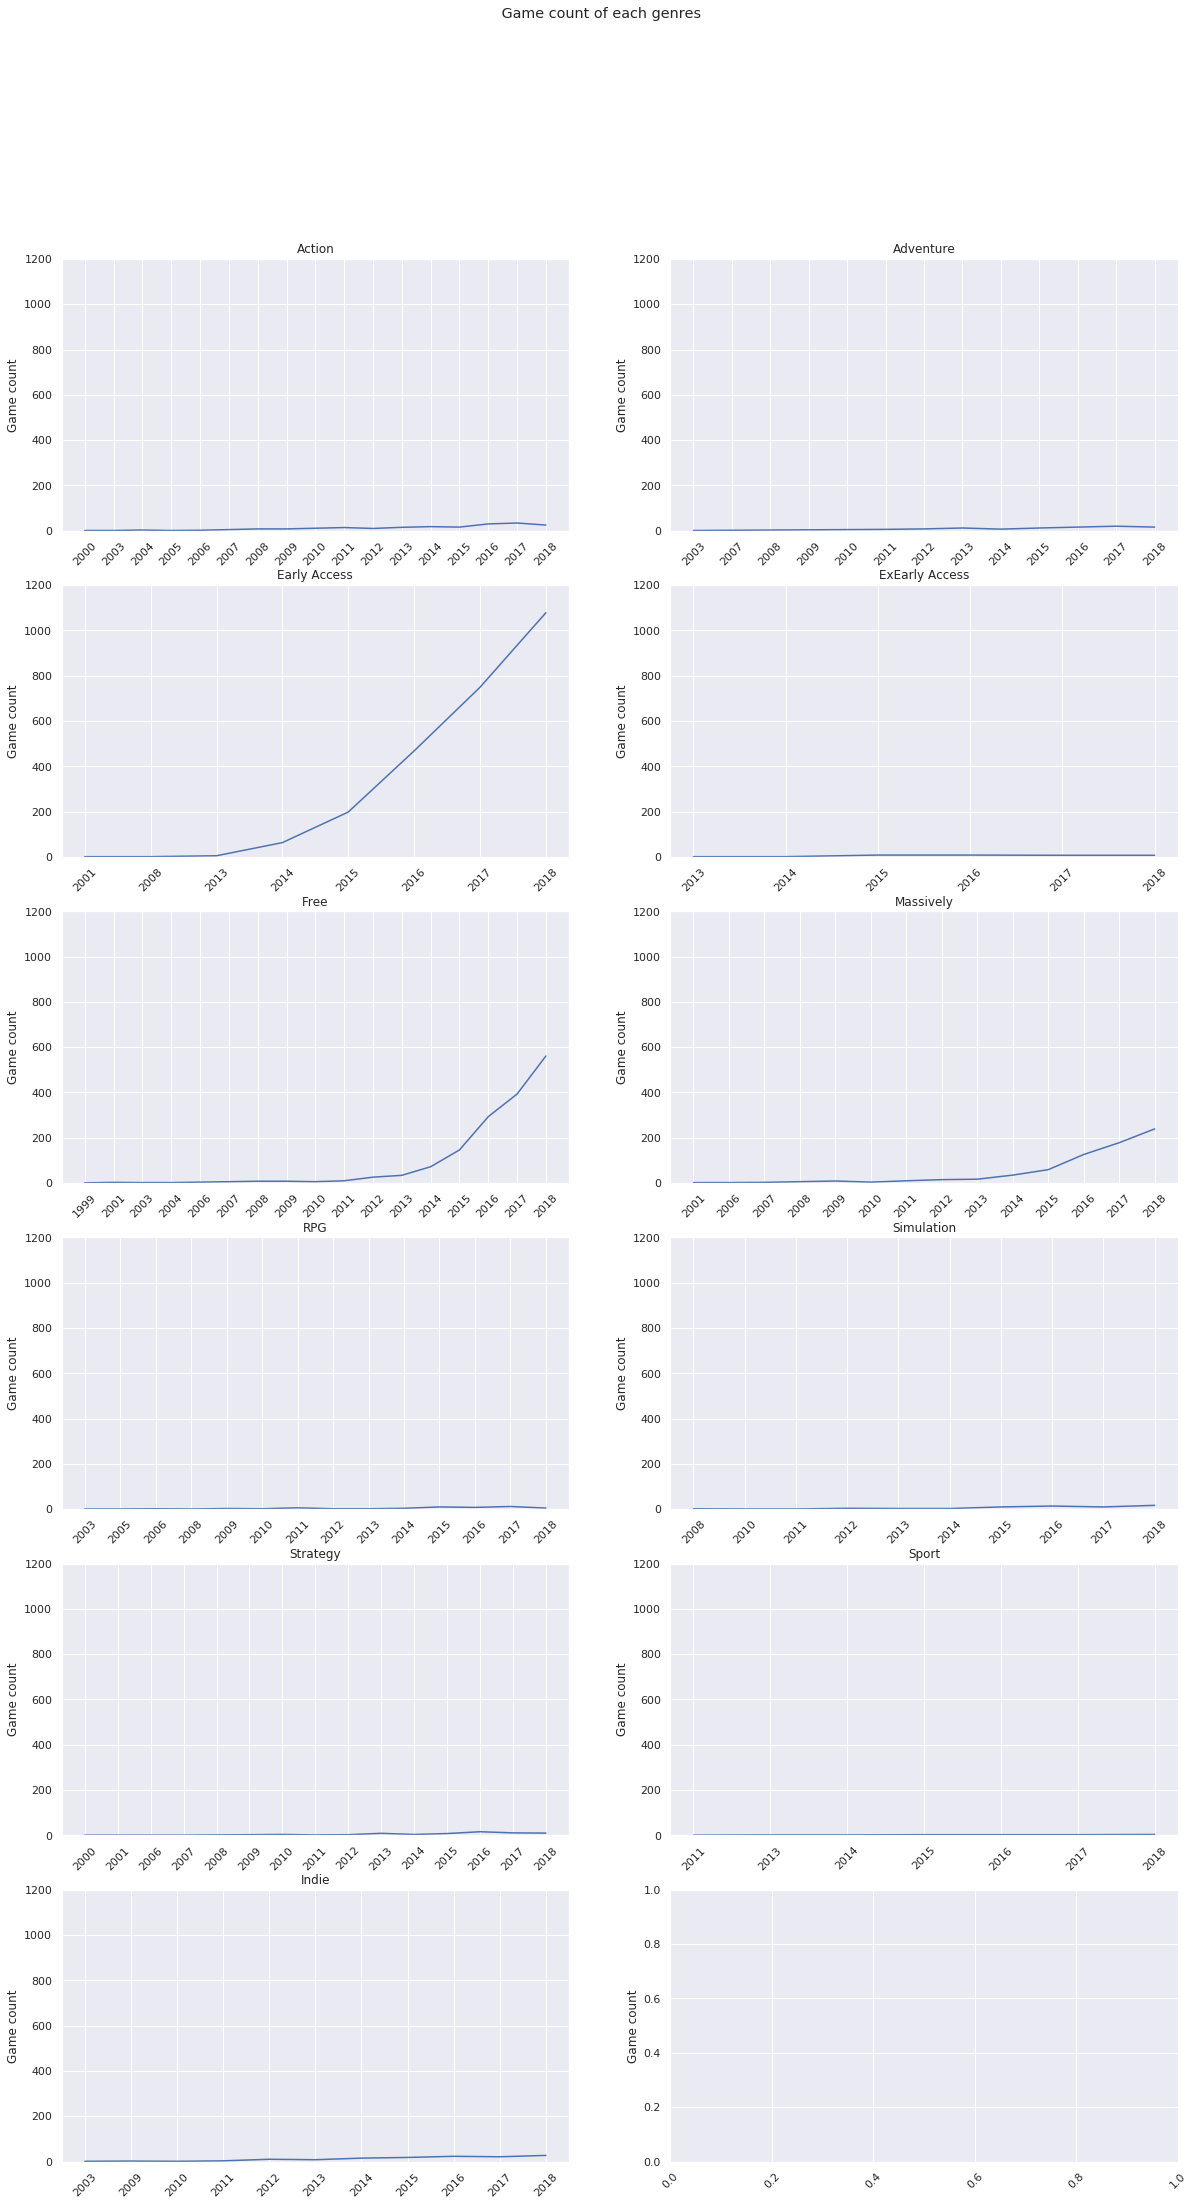

In [0]:
plot_feature('Game')

**แสดงค่าเฉลี่ยของ Meta score ในแต่ละปี ของแต่ละประเภท**

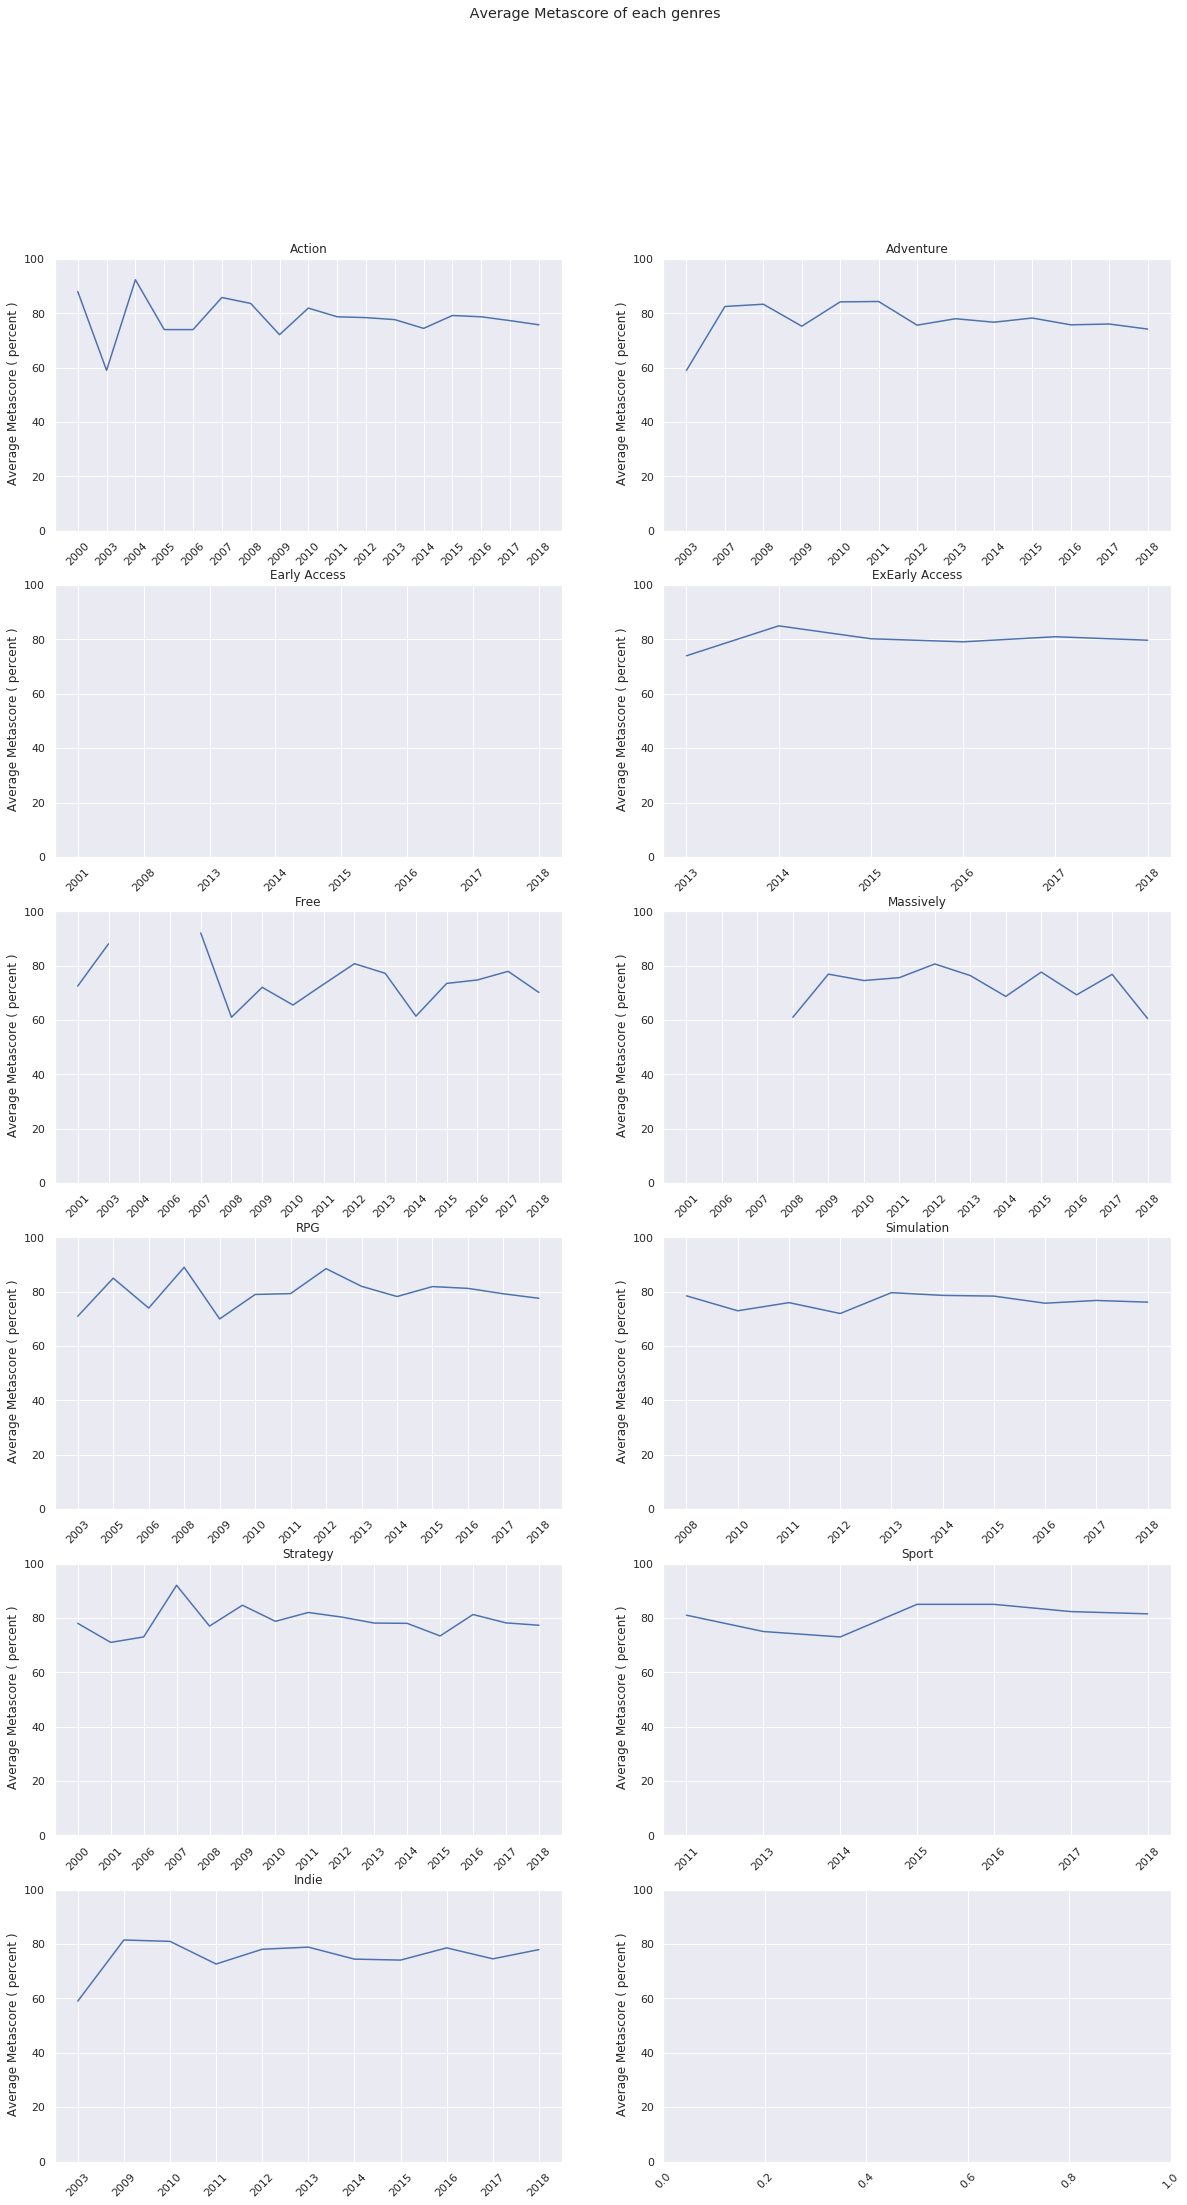

In [0]:
plot_feature('Metascore')

**แสดงค่าเฉลี่ยของ Price (ราคา) ในแต่ละปี ของแต่ละประเภท**

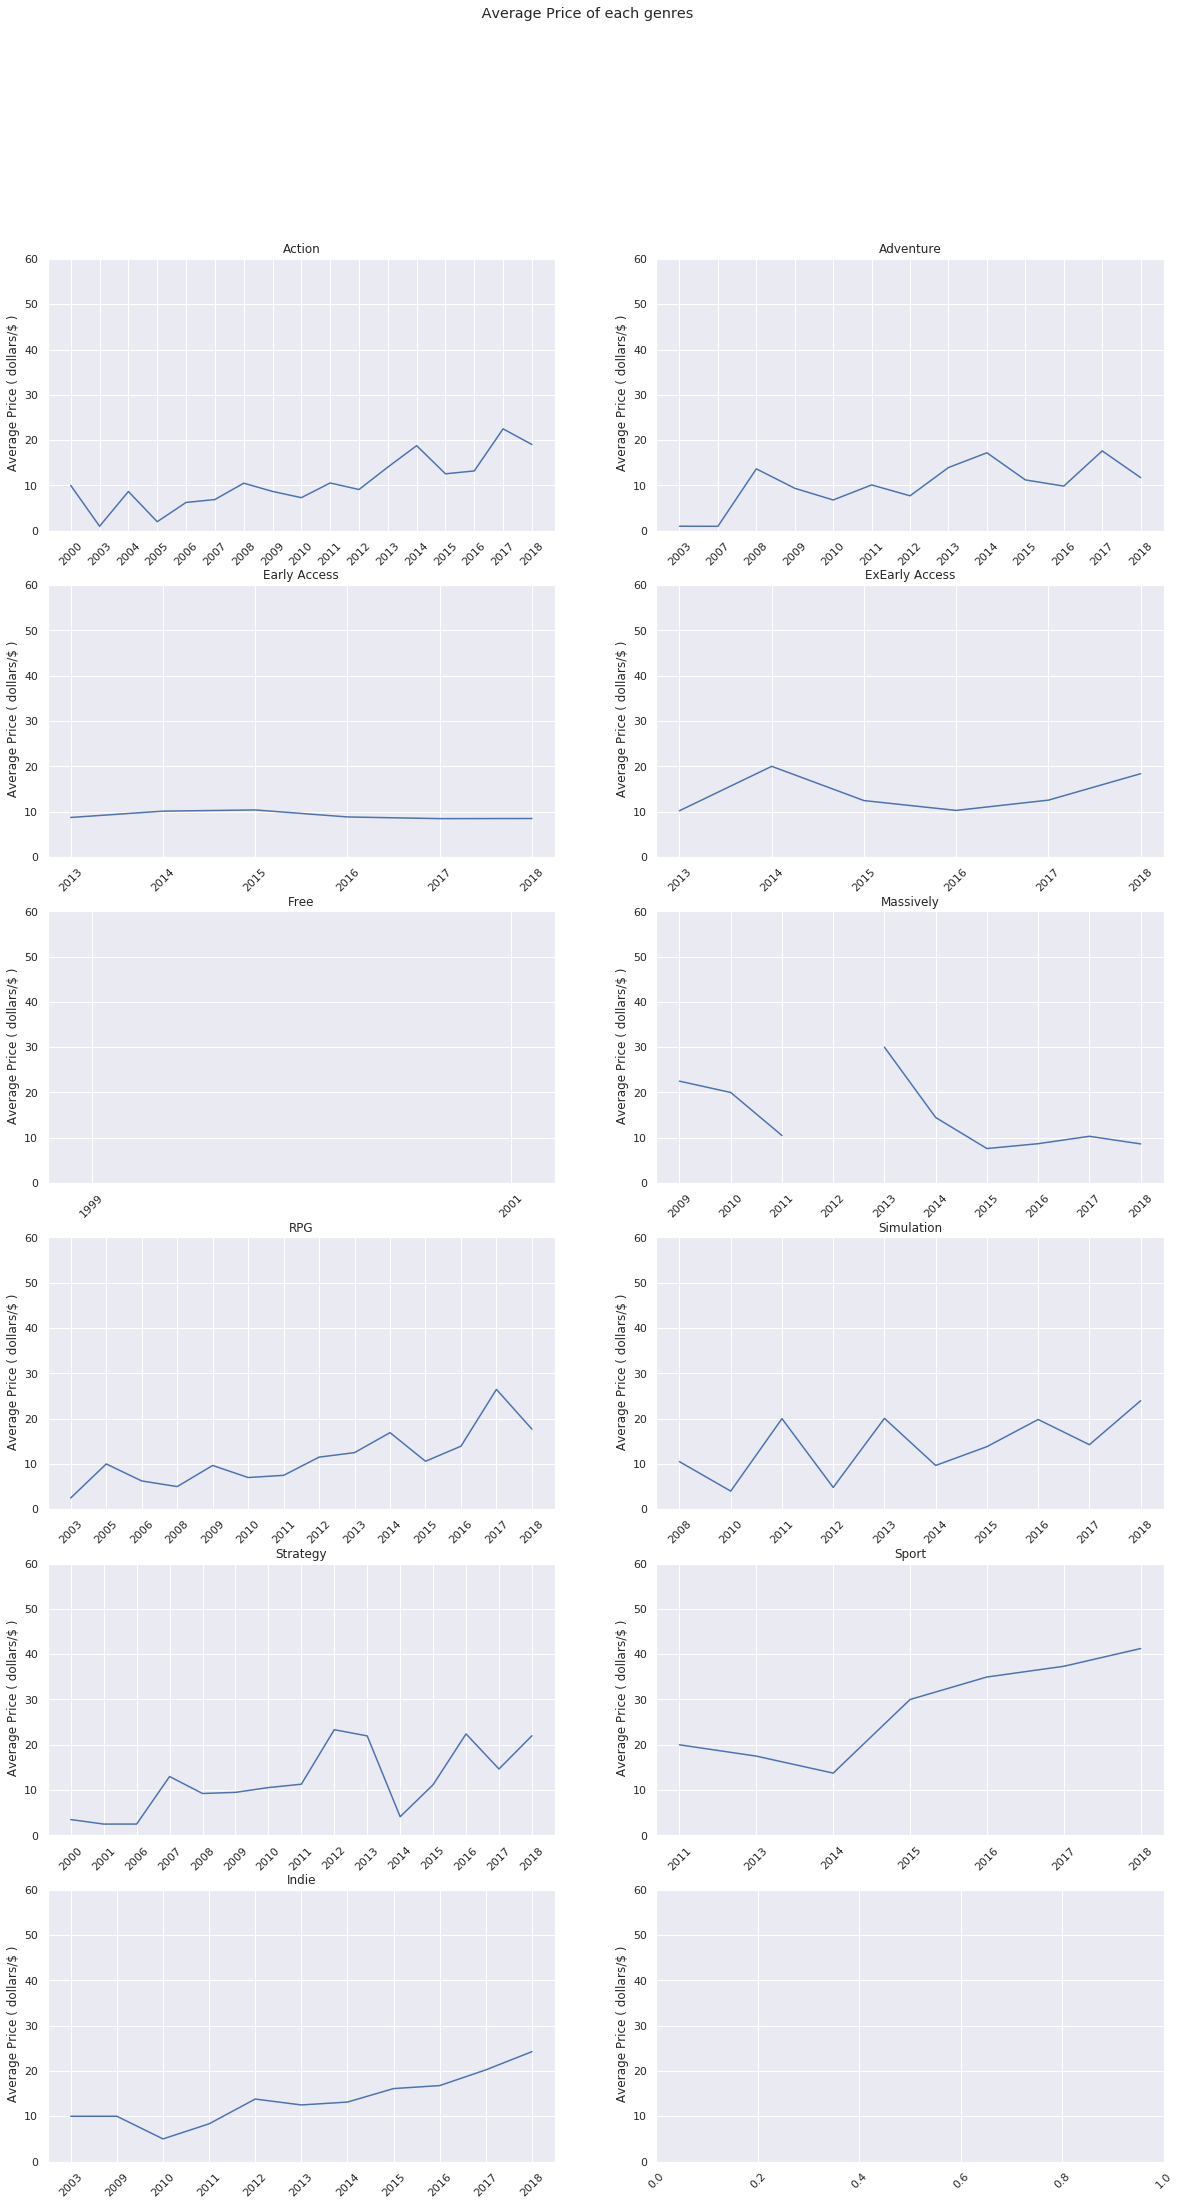

In [0]:
plot_feature('Price')

**แสดงค่าเฉลี่ยของ Onwers (จำนวนผู้เล่น)  ในแต่ละปี ของแต่ละประเภท**

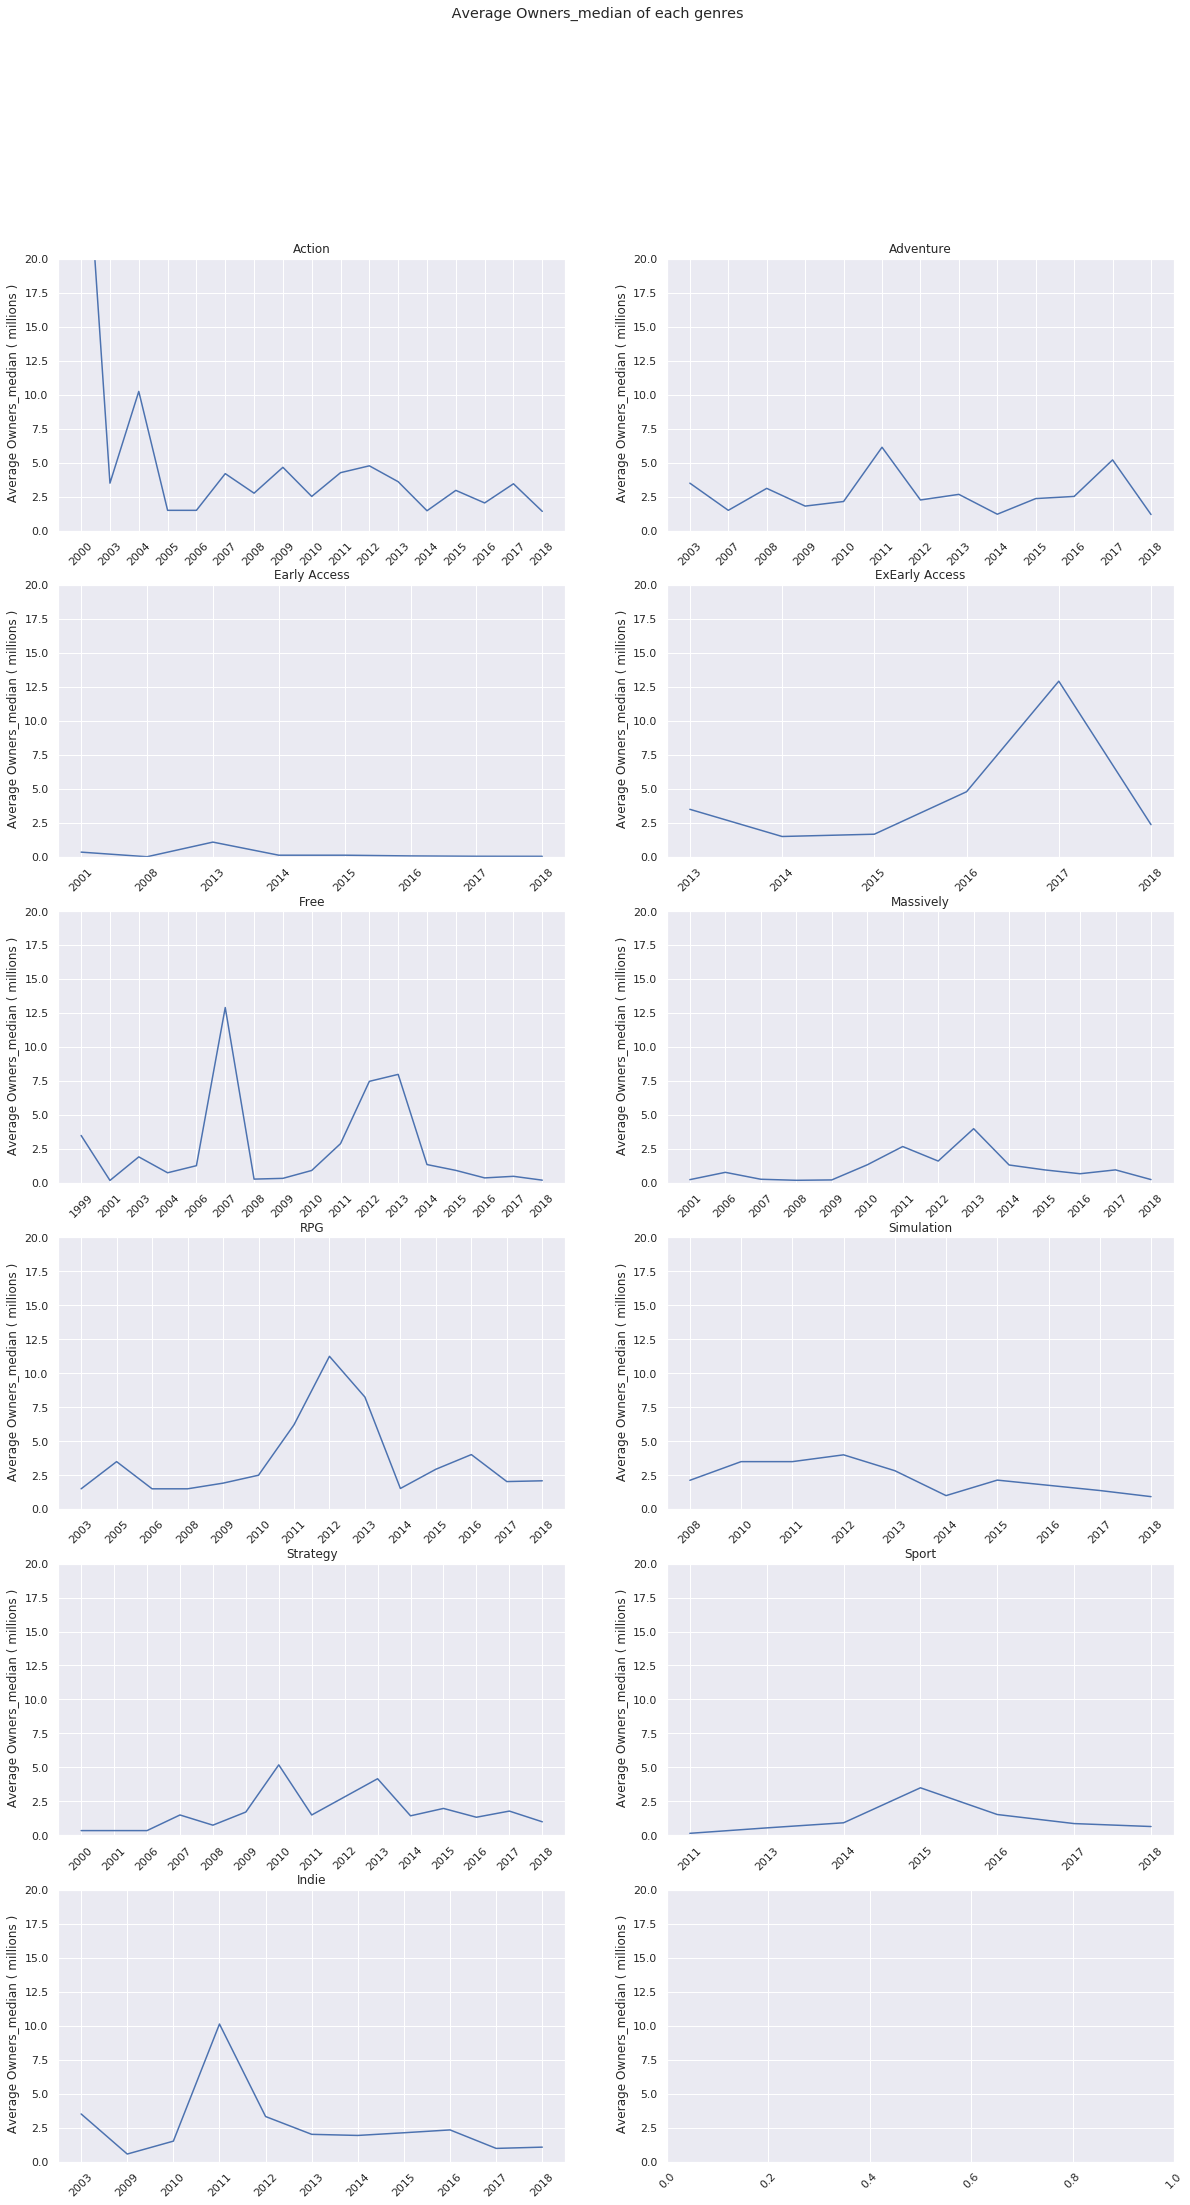

In [0]:
plot_feature('Owners_median')

**แสดงค่าเฉลี่ยของ Play time (เวลาในการเล่น) ในแต่ละปี ของแต่ละประเภท**

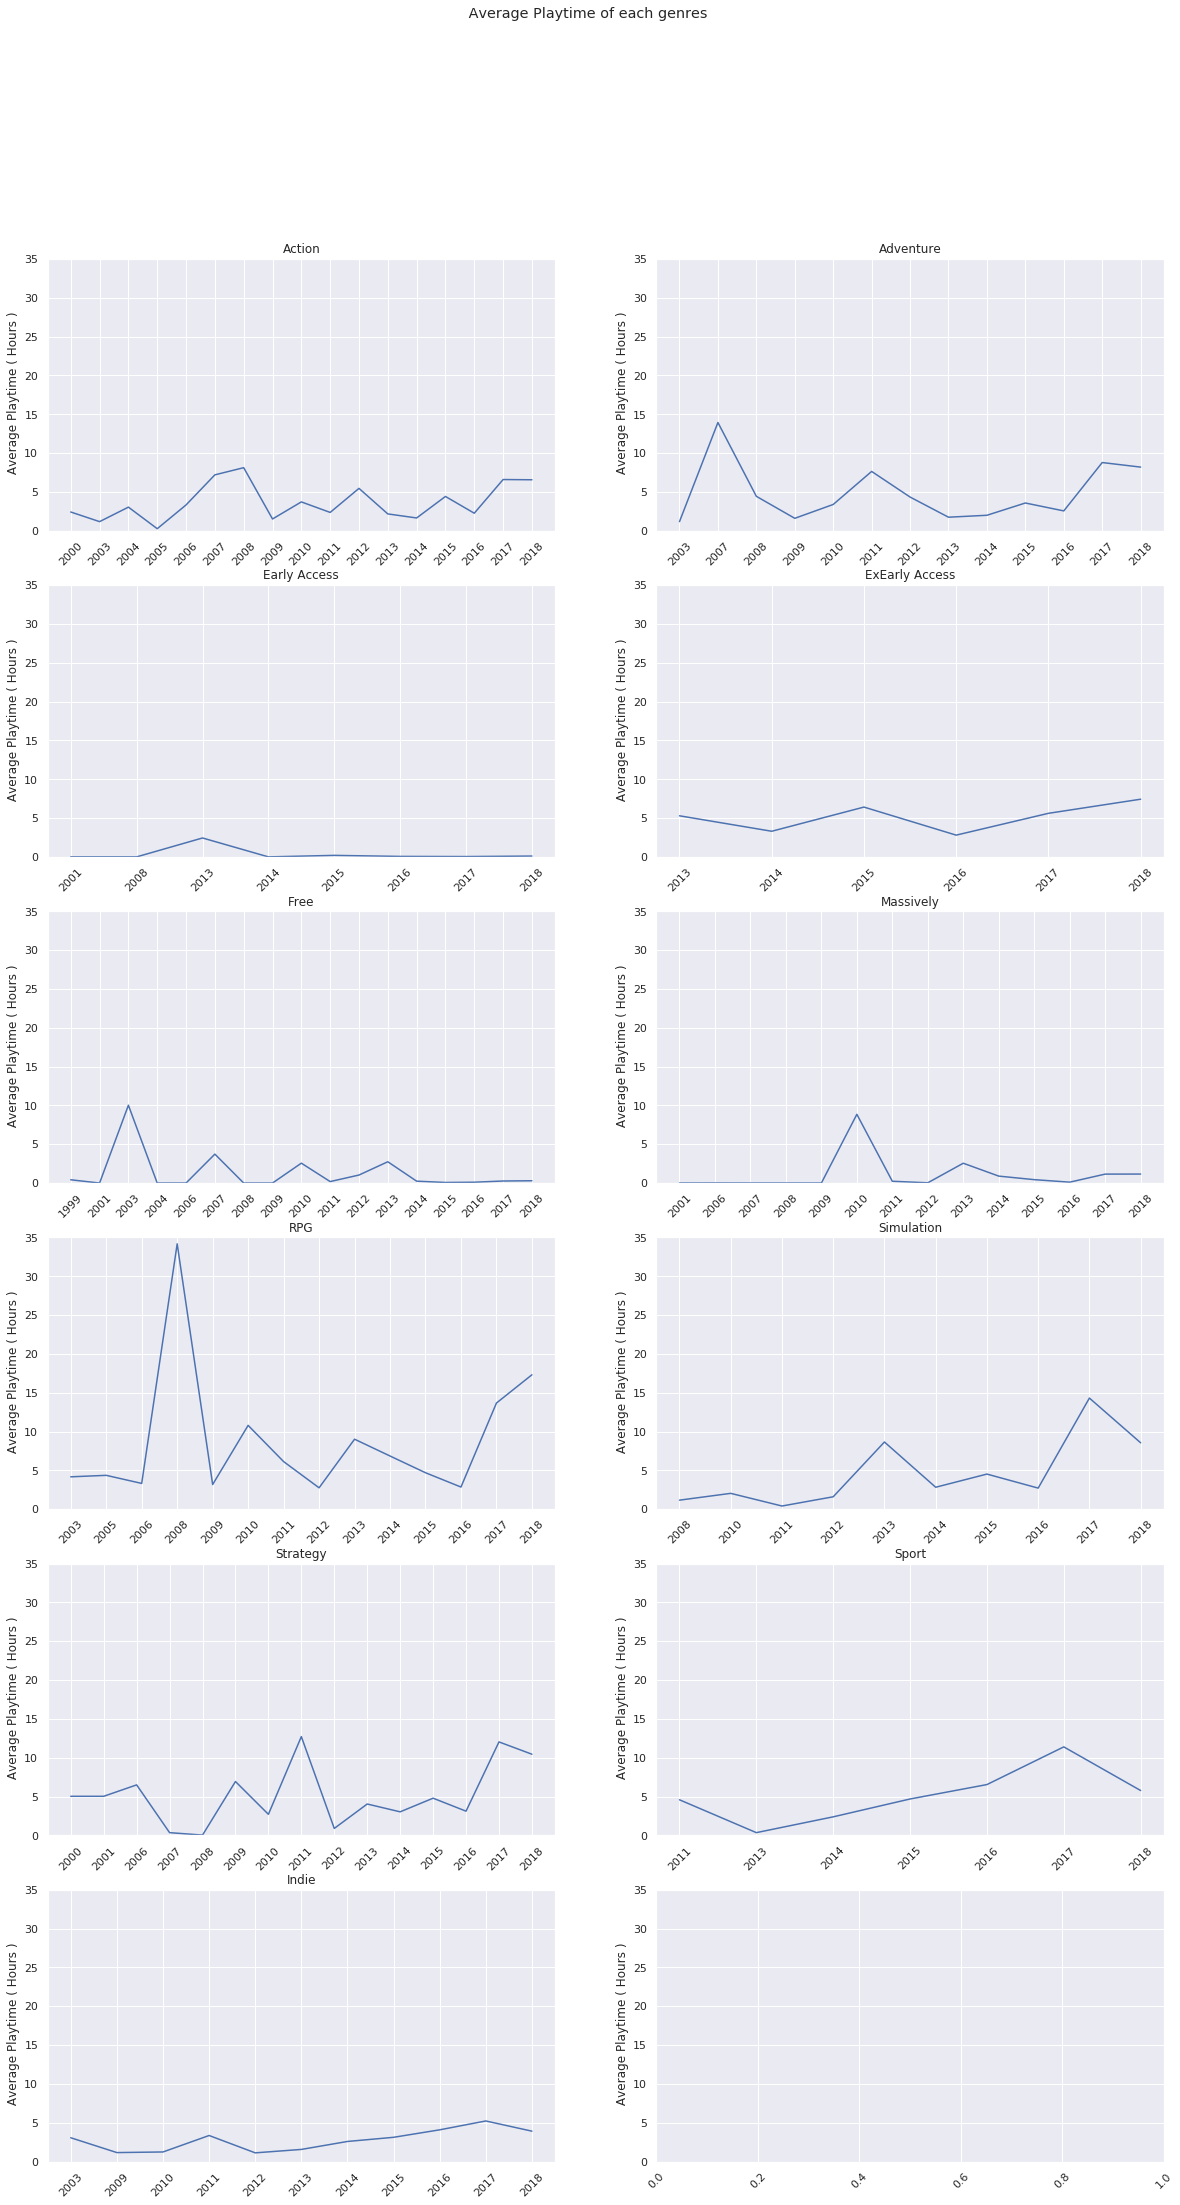

In [0]:
plot_feature('Playtime')

**3.2 ตารางแสดงค่าเฉลี่ยทุกๆปีของ features ต่างๆของเกมแต่ละประเภท**

In [0]:
# เก็บข้อมูลค่าเฉลี่ยของ Features ต่างๆ ของเกมแต่ละประเภท
act = action_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
adv = adventure_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
ear = earlyAccess_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
exE = exEarlyAccess_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
fre = free_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
sim = simulation_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
spo = sports_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
stra = strategy_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
ind = indie_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
rp = rpg_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})
mas = massively_games.agg({'Price':'mean', 'Playtime':'mean', 'Metascore':'mean', 'Owners_median':'mean', 'value':'mean'})

# สร้างตาราง
df_ratio = pd.DataFrame([act, adv, ear, exE, fre, sim, spo, stra, ind, rp, mas], index = ['action', 'adventure', 'earlyAccess', 'exEarlyAccess', 'free', 'simulation', 'sports',
                                                                                          'strategy', 'indie', 'rpg', 'massively'])
df_ratio.sort_values(by='value', ascending=False)

,Price,Playtime,Metascore,Owners_median,value
exEarlyAccess,13.371875,5.423125,79.968750,5.118750,71.799891
rpg,14.511186,8.280339,79.644068,3.372881,47.290805
strategy,16.394605,5.923026,78.644737,1.993553,42.109143
action,14.574356,4.204257,78.034653,3.127896,39.771393
indie,17.437674,3.443256,76.457364,1.974729,36.333102
sports,30.790000,5.610556,81.111111,1.300000,35.582833
adventure,12.120536,5.100179,77.133929,2.870223,34.922137
simulation,17.202308,6.420923,76.569231,1.757077,27.394718
massively,9.597324,0.898596,73.369231,0.785702,7.529532
earlyAccess,8.708846,0.086656,74.200000,0.058004,0.482585


จากตารางนี้เราจะเห็นได้ว่า เมื่อลองพิจารณาไปที่อัตราส่วนของค่าต่างๆในแต่ละเกม เกมที่สร้างรายได้ ได้มากที่สุดคือเกมประเภท exEarly Access

แต่เราต้องการข้อมูลที่ค่อนข้างเป็นปัจจุบันเพื่อพิจารณาว่าเกมประเภทใดสร้างรายได้ได้มากที่สุด

**3.3 แสดงข้อมูลของเกมทุกประเภท โดยแบ่งเป็นแต่ละปี(ปี 1999-2018)**

In [0]:
# เปลี่ยน type ของ Feature Year เป็น int
action_games.Year = action_games.Year.astype(int)
adventure_games.Year = adventure_games.Year.astype(int)
earlyAccess_games.Year = earlyAccess_games.Year.astype(int)
exEarlyAccess_games.Year = exEarlyAccess_games.Year.astype(int)
free_games.Year = free_games.Year.astype(int)
massively_games.Year = massively_games.Year.astype(int)
rpg_games.Year = rpg_games.Year.astype(int)
simulation_games.Year = simulation_games.Year.astype(int)
strategy_games.Year = strategy_games.Year.astype(int)
sports_games.Year = sports_games.Year.astype(int)
indie_games.Year = indie_games.Year.astype(int)

**สร้างฟังก์ชันแสดงข้อมูลของเกมทุกประเภท โดยสามารถเลือกดูได้ในแต่ละปี 
(ปี 1999-2018)**

In [0]:
def tableOf_year(year): # input ต้องเป็น integer /ปี 1999 - 2018
  func_year = lambda x : x == year # lambda function เพื่อใช้ในการสร้าง condition สำหรับการ Groupby Year
  genres_index=['action', 'adventure', 'earlyAccess', 'exEarlyAccess','free', 'massively', 'rpg', 'simulation', 'sports', 'strategy','indie'] # index สำหรับสร้าง Data Frame

  # Game count (จำนวนเกมแต่ละประเภทในปีนั้นๆ)
  Game_count = [action_games[action_games.Year.apply(func_year)].Game.count(), adventure_games[adventure_games.Year.apply(func_year)].Game.count(), 
                    earlyAccess_games[earlyAccess_games.Year.apply(func_year)].Game.count(), exEarlyAccess_games[exEarlyAccess_games.Year.apply(func_year)].Game.count(),
                    free_games[free_games.Year.apply(func_year)].Game.count(), massively_games[massively_games.Year.apply(func_year)].Game.count(), 
              rpg_games[rpg_games.Year.apply(func_year)].Game.count(), simulation_games[simulation_games.Year.apply(func_year)].Game.count(), 
              sports_games[sports_games.Year.apply(func_year)].Game.count(), strategy_games[strategy_games.Year.apply(func_year)].Game.count(), 
              indie_games[indie_games.Year.apply(func_year)].Game.count()]

  # Average Playtime (ค่าเฉลี่ยของเวลาในการเล่นเกมนั้นๆ) ของแต่ละประเภท 
  playtime_mean = [action_games[action_games.Year.apply(func_year)].Playtime.mean(), adventure_games[adventure_games.Year.apply(func_year)].Playtime.mean(), 
                    earlyAccess_games[earlyAccess_games.Year.apply(func_year)].Playtime.mean(), exEarlyAccess_games[exEarlyAccess_games.Year.apply(func_year)].Playtime.mean(),
                    free_games[free_games.Year.apply(func_year)].Playtime.mean(), massively_games[massively_games.Year.apply(func_year)].Playtime.mean(), 
              rpg_games[rpg_games.Year.apply(func_year)].Playtime.mean(), simulation_games[simulation_games.Year.apply(func_year)].Playtime.mean(), 
              sports_games[sports_games.Year.apply(func_year)].Playtime.mean(), strategy_games[strategy_games.Year.apply(func_year)].Playtime.mean(), 
              indie_games[indie_games.Year.apply(func_year)].Playtime.mean()]

  # Value (รายได้ของเกม) ของแต่ละประเภท โดยคำนวณจาก sum ของ Owners x Price ของแต่ละเกม
  value_total = [action_games[action_games.Year.apply(func_year)].value.sum(), adventure_games[adventure_games.Year.apply(func_year)].value.sum(), 
                    earlyAccess_games[earlyAccess_games.Year.apply(func_year)].value.sum(), exEarlyAccess_games[exEarlyAccess_games.Year.apply(func_year)].value.sum(),
                    free_games[free_games.Year.apply(func_year)].value.sum(), massively_games[massively_games.Year.apply(func_year)].value.sum(), 
              rpg_games[rpg_games.Year.apply(func_year)].value.sum(), simulation_games[simulation_games.Year.apply(func_year)].value.sum(), 
              sports_games[sports_games.Year.apply(func_year)].value.sum(), strategy_games[strategy_games.Year.apply(func_year)].value.sum(), 
              indie_games[indie_games.Year.apply(func_year)].value.sum()]

  # Average Owners (จำนวนผู้เล่นเฉลี่ย) ของเกมแต่ละประเภท
  Owners_mean = [action_games[action_games.Year.apply(func_year)].Owners_median.mean(), adventure_games[adventure_games.Year.apply(func_year)].Owners_median.mean(), 
                    earlyAccess_games[earlyAccess_games.Year.apply(func_year)].Owners_median.mean(), exEarlyAccess_games[exEarlyAccess_games.Year.apply(func_year)].Owners_median.mean(),
                    free_games[free_games.Year.apply(func_year)].Owners_median.mean(), massively_games[massively_games.Year.apply(func_year)].Owners_median.mean(), 
              rpg_games[rpg_games.Year.apply(func_year)].Owners_median.mean(), simulation_games[simulation_games.Year.apply(func_year)].Owners_median.mean(), 
              sports_games[sports_games.Year.apply(func_year)].Owners_median.mean(), strategy_games[strategy_games.Year.apply(func_year)].Owners_median.mean(), 
              indie_games[indie_games.Year.apply(func_year)].Owners_median.mean()]

  # Average Price (ราคาเกมเฉลี่ย) ของแต่ละประเภท
  Price_mean = [action_games[action_games.Year.apply(func_year)].Price.mean(), adventure_games[adventure_games.Year.apply(func_year)].Price.mean(), 
                    earlyAccess_games[earlyAccess_games.Year.apply(func_year)].Price.mean(), exEarlyAccess_games[exEarlyAccess_games.Year.apply(func_year)].Price.mean(),
                    free_games[free_games.Year.apply(func_year)].Price.mean(), massively_games[massively_games.Year.apply(func_year)].Price.mean(), 
              rpg_games[rpg_games.Year.apply(func_year)].Price.mean(), simulation_games[simulation_games.Year.apply(func_year)].Price.mean(), 
              sports_games[sports_games.Year.apply(func_year)].Price.mean(), strategy_games[strategy_games.Year.apply(func_year)].Price.mean(), 
              indie_games[indie_games.Year.apply(func_year)].Price.mean()]
            
  # Average Meta score (ร้อยละความนิยมในเกมนั้นๆ) ของแต่ละประเภท
  Metascore_mean = [action_games[action_games.Year.apply(func_year)].Metascore.mean(), adventure_games[adventure_games.Year.apply(func_year)].Metascore.mean(), 
                    earlyAccess_games[earlyAccess_games.Year.apply(func_year)].Metascore.mean(), exEarlyAccess_games[exEarlyAccess_games.Year.apply(func_year)].Metascore.mean(),
                    free_games[free_games.Year.apply(func_year)].Metascore.mean(), massively_games[massively_games.Year.apply(func_year)].Metascore.mean(), 
              rpg_games[rpg_games.Year.apply(func_year)].Metascore.mean(), simulation_games[simulation_games.Year.apply(func_year)].Metascore.mean(), 
              sports_games[sports_games.Year.apply(func_year)].Metascore.mean(), strategy_games[strategy_games.Year.apply(func_year)].Metascore.mean(), 
              indie_games[indie_games.Year.apply(func_year)].Metascore.mean()]

  # สร้าง Data Frame
  Table = pd.DataFrame({'Value (in millions of USD/$)':value_total, 'Game':Game_count, 'Owners (millions account)':Owners_mean, 'Metascore (Percent)':Metascore_mean,
                        'Price ($)':Price_mean, 'Playtime (hours)': playtime_mean, },index=genres_index)
  
  Table = Table.sort_values(by='Value (in millions of USD/$)', ascending = False) # sort by Value
  return Table

**สร้างฟังก์ชันแสดงข้อมูลของเกมทุกประเภทและแสดงกราฟข้อมูล โดยสามารถเลือกดูได้ในแต่ละปี 
(ปี 1999-2018)**

In [0]:
def plot_tableOfYear(func_tableOfYear): # input คือ tableOf_year(year)
  table = func_tableOfYear
  color_set = ['lightcoral', 'lightgrey', 'lightsalmon', 'lightgreen', 'lightskyblue', 'orange', 'lightseagreen', 'plum', 'lightsteelblue', 'lightpink', 'lightcyan' ] # สร้าง set ของ color ในการทำ bar plot
  # plot bar graphs สำหรับแต่ละ Feature
  table.plot.bar(y='Value (in millions of USD/$)', rot=45,color=color_set)
  table.plot.bar(y='Game',rot=45, color=color_set)
  table.plot.bar(y='Owners (millions account)' ,rot=45,color=color_set)
  table.plot.bar(y='Metascore (Percent)', rot=45,color=color_set)
  table.plot.bar(y='Price ($)', rot=45,color=color_set)
  table.plot.bar(y='Playtime (hours)',  rot=45,color=color_set)
  return table

**Test function**

**ลองดูข้อมูล ของปี 2015 - 2018**

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
indie,735.02405,18,2.116389,74.111111,16.101111,3.117778
action,642.69500,16,2.968750,79.187500,12.565000,4.412500
rpg,456.50100,10,2.940000,81.900000,10.580000,4.696000
simulation,407.16100,10,2.140000,78.400000,13.810000,4.523000
adventure,370.01625,12,2.364583,78.250000,11.215000,3.569167
strategy,292.89150,8,1.981250,73.375000,11.177500,4.786250
sports,254.89500,3,3.500000,85.000000,29.990000,4.683333
earlyAccess,215.03050,198,0.123889,86.000000,10.362515,0.194091
exEarlyAccess,154.86650,8,1.668750,80.250000,12.427500,6.412500
massively,30.06650,59,0.967288,77.600000,7.613529,0.436441


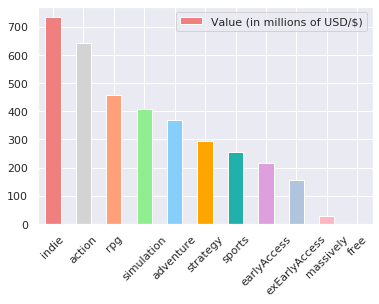

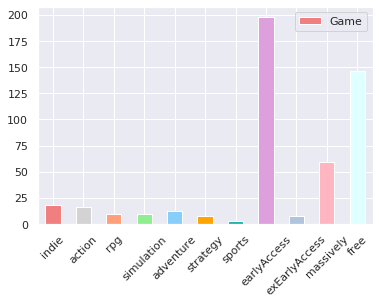

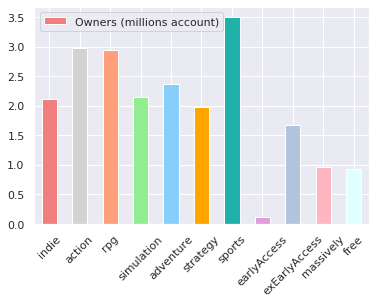

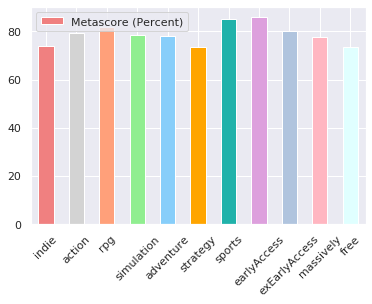

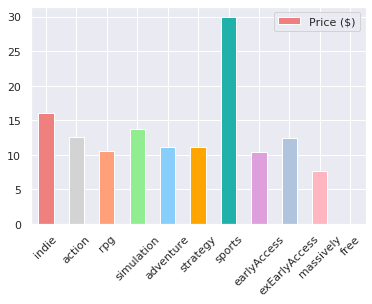

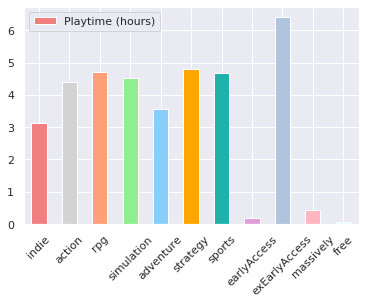

In [0]:
plot_tableOfYear(tableOf_year(2015))

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
indie,1013.97775,23,2.325000,78.608696,16.761739,4.080870
action,770.76180,30,2.044000,78.700000,13.200000,2.254333
strategy,688.33415,16,1.333438,81.250000,22.393125,3.114375
simulation,480.26900,14,1.757143,75.785714,19.804286,2.717143
rpg,389.87850,8,4.018750,81.250000,13.908750,2.852500
adventure,352.21365,16,2.524062,75.750000,9.849375,2.551875
exEarlyAccess,320.76650,8,4.793750,79.125000,10.258750,2.800000
earlyAccess,239.58705,468,0.070182,NaN,8.814439,0.060064
sports,91.85400,3,1.533333,85.000000,34.956667,6.540000
massively,87.14625,126,0.685317,69.250000,8.688182,0.111984


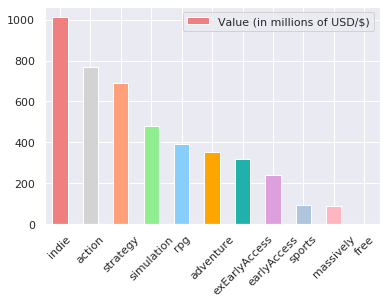

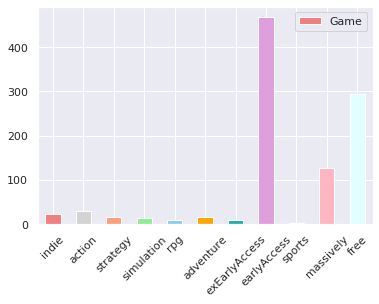

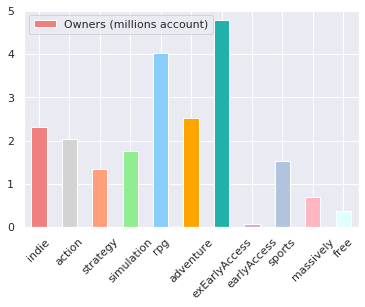

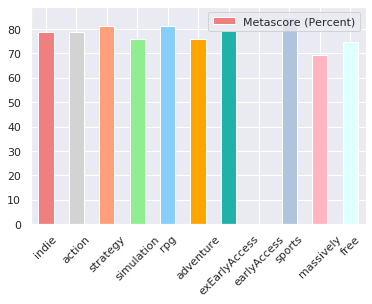

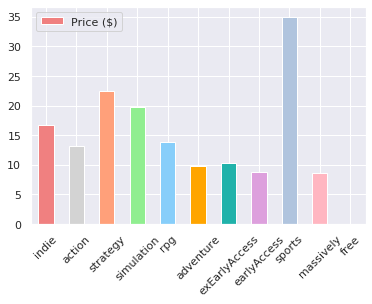

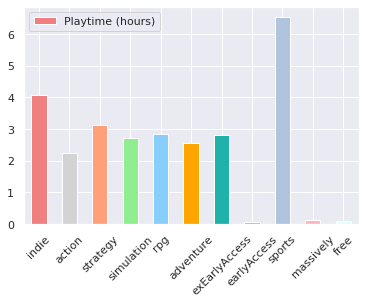

In [0]:
plot_tableOfYear(tableOf_year(2016))

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
action,2068.64090,34,3.453235,77.294118,22.485588,6.590294
adventure,1604.74765,20,5.211750,76.050000,17.620000,8.778500
massively,1435.32540,178,0.968315,76.777778,10.319067,1.149831
exEarlyAccess,1381.34500,7,12.928571,81.000000,12.525714,5.608571
indie,630.22225,21,0.965476,74.571429,20.228095,5.221905
rpg,466.80600,12,2.033333,79.250000,26.448333,13.669167
strategy,386.75350,11,1.786364,78.181818,14.649091,12.032727
simulation,178.38750,10,1.375000,76.800000,14.240000,14.310000
earlyAccess,167.90335,749,0.044933,NaN,8.444344,0.040921
sports,124.17400,3,0.866667,82.333333,37.323333,11.393333


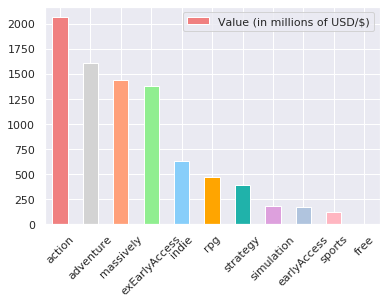

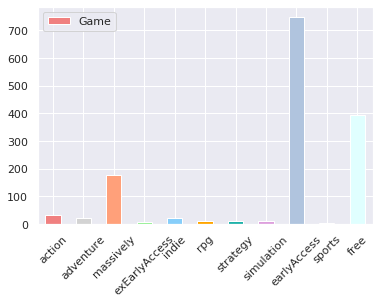

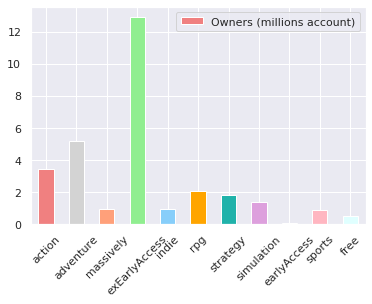

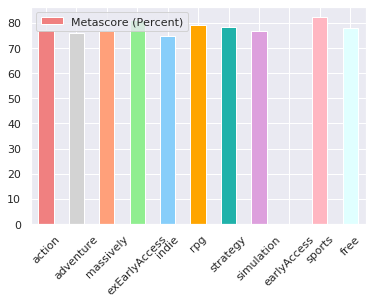

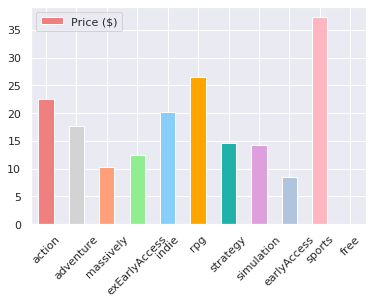

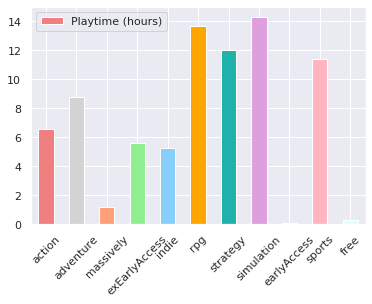

In [0]:
plot_tableOfYear(tableOf_year(2017))

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
action,956.41895,25,1.423200,75.760000,19.037200,6.561200
indie,797.76440,27,1.057778,77.962963,24.249259,3.909259
massively,465.61295,239,0.255188,60.500000,8.636719,1.155732
exEarlyAccess,374.96850,7,2.371429,79.714286,18.364286,7.427143
adventure,364.85580,16,1.191875,74.187500,11.718750,8.191875
simulation,353.90165,17,0.924118,76.176471,23.945882,8.551176
earlyAccess,328.11895,1078,0.040867,70.666667,8.467561,0.104583
rpg,224.72050,5,2.090000,77.600000,17.680000,17.308000
strategy,201.27525,10,0.997500,77.300000,21.990000,10.449000
sports,117.72400,4,0.650000,81.500000,41.240000,5.772500


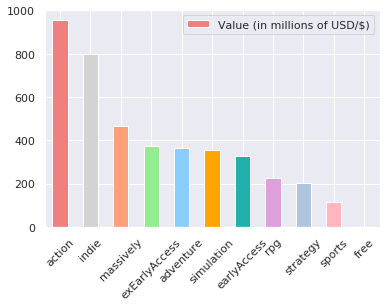

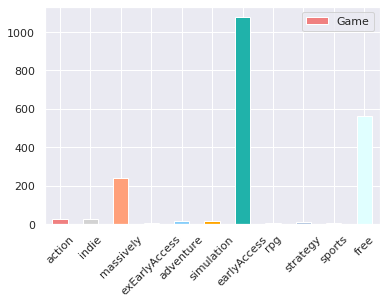

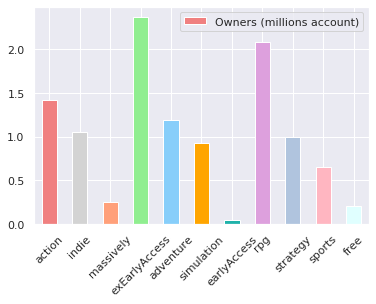

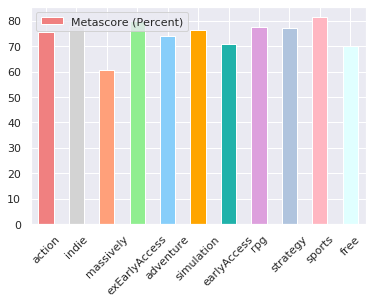

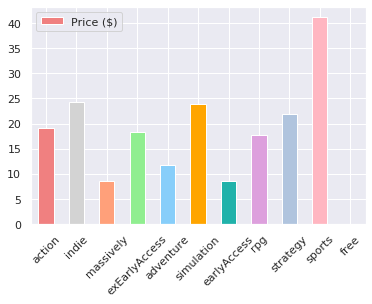

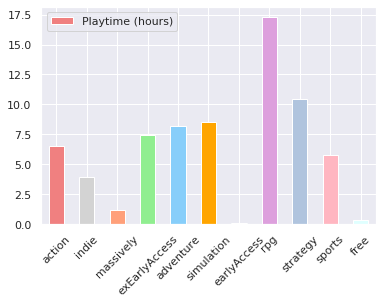

In [0]:
plot_tableOfYear(tableOf_year(2018))

จากการสังเกตค่าใน column value ในปี 2016 - 2018 จะเห็นได้ว่าเกมประเภท Action สร้างรายได้มากที่สุด  เราจึงสามารถอนุมานได้ว่าในปัจจุบันเกมประเภท Action เป็นที่นิยม มีจำนวนเกมมากและมีผู้เล่นจำนวนมาก

# **4. Modelling the data (สร้างโมเดล เช่น โมเดลทำนายผล หรือ Predictive Model)**

**สร้าง model เพื่อวิเคราะห์ว่าปัจจัยใดที่ส่งผลต่อจำนวนผู้เล่นเกม ประเภท Action และลองทำการทำนาายผล โดยใช้ Random forests**

เนื่องจาก features ของข้อมูลค่อนข้างน้อย เราจึงนำทุก features ที่มีมาใช้ในการทำนายผล

**ทำการดึงข้อมูลเกมประเภท action เพื่อมาใช้ในการทำ Random forests Model**

In [0]:
action_data = action_games # ดึงข้อมูลจาก action_games
action_data = action_data[['Game', 'Developer(s)', 'Publisher(s)','Year','Price', 'Metascore',
       'Playtime', 'value', 'Owners_median']]
# ทำการเปลี่ยนหน่วยของ Owners_median ให้เป็นหลักล้านเช่นเดิม เพื่อเมื่อนำไปเปรียบเทียบในการ prediction จะเห็นความแตกต่างได้ง่าย
action_data['Owners_median'] = action_data['Owners_median']*1000000 

In [0]:
action_data.head()

,Game,Developer(s),Publisher(s),Year,Price,Metascore,Playtime,value,Owners_median
AppId,,,,,,,,,
119,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,2017,14.99,86.0,12.54,1124.25,75000000.0
63,Counter-Strike,Valve,Valve,2000,9.99,88.0,2.41,349.65,35000000.0
2,Grand Theft Auto V,Rockstar North,Rockstar Games,2015,14.99,96.0,11.16,224.85,15000000.0
4,Half-Life 2,Valve,Valve,2004,0.99,96.0,0.43,14.85,15000000.0
5,Portal 2,Valve,Valve,2011,9.99,95.0,4.28,149.85,15000000.0


In [0]:
action_data.columns # check column ต่างๆ

Index(['Game', 'Developer(s)', 'Publisher(s)', 'Year', 'Price', 'Metascore',
       'Playtime', 'value', 'Owners_median'],
      dtype='object')

In [0]:
action_data.shape # check ขนาด

(202, 9)

In [0]:
action_data.info() # check ข้อมูลของ Action_data เพื่อให้แน่ใจว่าไม่มี missing value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 119 to 1447
Data columns (total 9 columns):
Game             202 non-null object
Developer(s)     202 non-null object
Publisher(s)     202 non-null object
Year             202 non-null int64
Price            202 non-null float64
Metascore        202 non-null float64
Playtime         202 non-null float64
value            202 non-null float64
Owners_median    202 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 15.8+ KB


**ทำการ plot Heatmap และ scatter matrix เพื่อดูความสัมพันธ์ของ features ต่างในเกมประเภท Action**

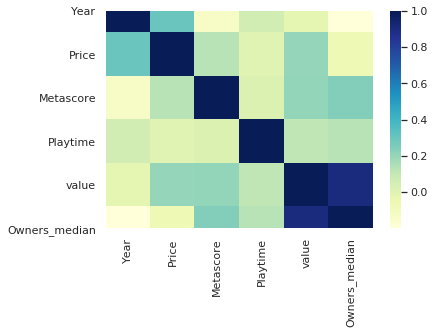

In [0]:
sns.heatmap(action_data.corr(), cmap = 'YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95ada7ba20>,
      dtype=object)

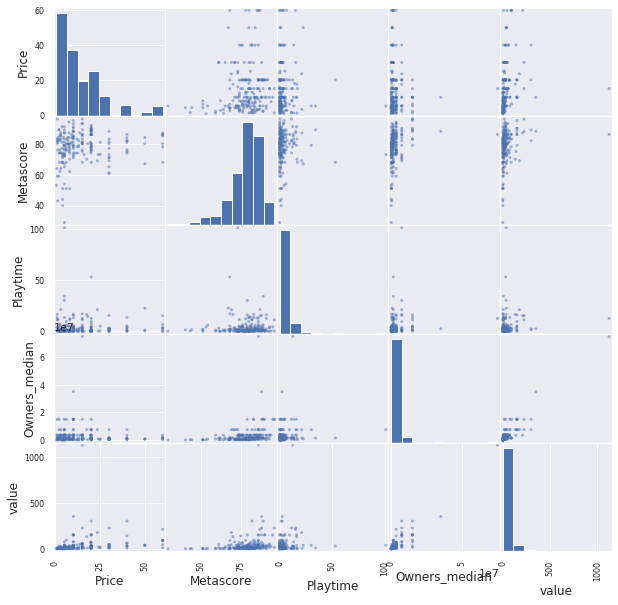

In [0]:
pd.plotting.scatter_matrix(action_data[['Price', 'Metascore', 'Playtime', 'Owners_median', 'value']], figsize=(10,10))

**เริ่มทำการสร้าง  Random Forests Model**

- เนื่องจาก action_data เรามีข้อมูลค่อนข้างน้อย ซึ่งเราได้ลองทำการแบ่งข้อมูล ออกเป็นสามส่วน คือตัว train, test, predict แล้วทำการรัน Model ผลปรากฎว่า Accuracy score น้อยมาก เพราะข้อมูลในการ train, test มีน้อย

- ดังนั้นเราจึงแบ่งสัดส่วนตัว train และ test ออกเป็น 80% และ 20% ตามลำดับ จะได้ Accuracy score สูงขึ้น 

- เมื่อเราได้ Accuracy score ที่เหมาะสมแล้ว เราจึงลองนำข้อมูลบางส่วนของ Action_data มาทำการ prediction Model

- จากขั้นตอนที่แล้ว การนำข้อมูลเดิมที่ผ่านการ train ของ Model มาแล้ว ย่อมมีความแม่นยำในการ prediction มากอยู่แล้ว เราจึงจะลองหาข้อมูลจากเกมประเภทอื่นที่ได้รับความนิยมหรือมีมูลค่าทางการตลาดใกล้เคียงกับ Action games อาทิเช่น indie games , adventure games มาใช้เป็นตัว prediction Model 

In [0]:
# เริ่มสร้าง Model

#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

X = action_data[['Price','Playtime','value','Metascore']] # Features ที่ใช้ในการ train model
y = action_data['Owners_median'] # lebel

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) # สร้าง model

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) # fit model โดยใส่ค่า X_train, y_trian

y_pred=clf.predict(X_test) # ทำการการ test model

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# ตรวจสอบความแม่นยำของ model
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5853658536585366


**นำข้อมูลมาPredict Model**


In [0]:
# ข้อมูลเดิมบางส่วนจาก Action_data
X_predict1 = action_data[['Price','Playtime','value','Metascore']].iloc[10:20]
y_pred=clf.predict(X_predict1)

In [0]:
y_pred # ดูคำตอบของการ predict

array([15000000., 15000000.,  7500000.,  3500000.,  7500000.,  7500000.,
        7500000.,  7500000.,  7500000.,  3500000.])

In [0]:
# สร้าง Data Frame เพื่อจะได้เห็นค่า Predict กับค่าจริงว่าแตกต่างกันอย่างไร
df_predict1 = action_data[['Price','Playtime','value','Owners_median']].iloc[10:20] 
df_predict1['Predicted'] = y_pred

In [0]:
# แสดงตาราง ซึ่งจะเห็นได้ว่าค่าจากการ predict กับค่าจริง แตกต่างกันน้อยมากๆ เพราะข้อมูลที่นำมา predict เคยยผ่านการ train ของ Mode มาแล้ว
df_predict1

,Price,Playtime,value,Owners_median,Predicted
AppId,,,,,
222,4.99,13.50,74.850,15000000.0,15000000.0
472,9.99,16.03,149.850,15000000.0,15000000.0
41,19.99,0.01,149.925,7500000.0,7500000.0
49,1.99,1.02,14.925,7500000.0,3500000.0
74,29.99,15.44,224.925,7500000.0,7500000.0
123,19.99,1.30,149.925,7500000.0,7500000.0
128,19.99,9.51,149.925,7500000.0,7500000.0
132,2.99,1.49,22.425,7500000.0,7500000.0
187,9.99,3.28,74.925,7500000.0,7500000.0


**ลองนำข้อมูลจากเกมประเภท indie และ adventure มาใช้ในการ prediction Model**

In [0]:
# 1.เราจะใช้ข้อมมูลจาก indie games
indie_data = indie_games # ดึงข้อมูลจาก indie_games
indie_data = indie_data[['Game', 'Developer(s)', 'Publisher(s)','Year','Price', 'Metascore',
       'Playtime', 'value', 'Owners_median']]
# ทำการเปลี่ยนหน่วยของ Owners_median ให้เป็นหลักล้านเช่นเดิม เพื่อเมื่อนำไปเปรียบเทียบในการ prediction จะเห็นความแตกต่างได้ง่าย
indie_data['Owners_median'] = indie_data['Owners_median']*1000000 

In [0]:
# ดูรายละเอียดของ indie_data
indie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 59 to 1035
Data columns (total 9 columns):
Game             129 non-null object
Developer(s)     129 non-null object
Publisher(s)     129 non-null object
Year             129 non-null int64
Price            129 non-null float64
Metascore        129 non-null float64
Playtime         129 non-null float64
value            129 non-null float64
Owners_median    129 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 10.1+ KB


In [0]:
# นำ indie_data มา Prediction Model
X_predict2 = indie_data[['Price','Playtime','value','Owners_median']]
y_pred = clf.predict(X_predict2)

In [0]:
# ลองดูคำตอบจากการ Prediction Model 
y_pred

array([15000000.,  7500000., 15000000., 15000000., 15000000.,  7500000.,
        7500000., 15000000., 15000000., 15000000.,  7500000.,  3500000.,
       15000000.,  1500000.,  1500000.,  3500000.,  3500000.,  3500000.,
        3500000.,  1500000.,  3500000.,  3500000.,  1500000.,  3500000.,
        1500000.,  1500000.,  3500000.,  3500000.,  3500000.,  3500000.,
        3500000.,  3500000.,  3500000.,  1500000.,   750000.,  1500000.,
        3500000.,  1500000.,  1500000.,  1500000.,  1500000.,  1500000.,
        3500000.,  1500000.,  1500000.,  1500000.,  3500000.,  3500000.,
        1500000.,  3500000.,  1500000.,  1500000.,  1500000.,  1500000.,
        1500000.,  1500000.,   350000.,   750000.,  1500000.,  1500000.,
         750000.,  1500000.,  1500000.,   750000.,   350000.,  1500000.,
         350000.,  1500000.,   750000.,   750000.,   750000.,   750000.,
         750000.,  1500000.,   350000.,   750000.,   750000.,   350000.,
        1500000.,  1500000.,  1500000.,   750000., 

In [0]:
# สร้าง Data Frame เพื่อดูค่าจริง กับค่าที่ได้จากการ Prediction Model
df_predict2 = indie_data
df_predict2['Predicted'] = y_pred

In [0]:
# แสดงตาราง
df_predict2.head(20)

,Game,Developer(s),Publisher(s),Year,Price,Metascore,Playtime,value,Owners_median,Predicted
AppId,,,,,,,,,,
59,Rocket League,"Psyonix, Inc.","Psyonix, Inc.",2015,19.99,86.0,6.43,299.850,15000000.0,15000000.0
145,Grim Dawn,Crate Entertainment,Crate Entertainment,2016,24.99,83.0,42.17,374.850,15000000.0,7500000.0
174,Terraria,Re-Logic,Re-Logic,2011,9.99,83.0,9.53,149.850,15000000.0,15000000.0
1326,The Tiny Bang Story,Colibri Games,Colibri Games,2011,4.99,63.0,0.05,74.850,15000000.0,15000000.0
132,Don't Starve Together,Klei Entertainment,Klei Entertainment,2016,14.99,83.0,2.44,112.425,7500000.0,15000000.0
325,Outlast,Red Barrels,Red Barrels,2013,19.99,80.0,0.59,149.925,7500000.0,7500000.0
389,Chivalry: Medieval Warfare,Torn Banner Studios,Torn Banner Studios,2012,24.99,79.0,0.03,187.425,7500000.0,7500000.0
394,Euro Truck Simulator 2,SCS Software,SCS Software,2012,19.99,79.0,5.53,149.925,7500000.0,15000000.0
792,A Story About My Uncle,Gone North Games,Coffee Stain Publishing,2014,12.99,73.0,4.59,97.425,7500000.0,15000000.0


In [0]:
# 2.ใช้ข้อมูลจาก adventure gaames มาใช้ในการ Prediction Model
adventure_data = indie_games # ดึงข้อมูลจาก indie_games
# เรียง column ใหม่
adventure_data = adventure_data[['Game', 'Developer(s)', 'Publisher(s)','Year','Price', 'Metascore',
       'Playtime', 'value', 'Owners_median']]
# ทำการเปลี่ยนหน่วยของ Owners_median ให้เป็นหลักล้านเช่นเดิม เพื่อเมื่อนำไปเปรียบเทียบในการ prediction จะเห็นความแตกต่างได้ง่าย
adventure_data['Owners_median'] = adventure_data['Owners_median']*1000000 

In [0]:
# ดูรายละเอียดของ adventure_data
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 59 to 1035
Data columns (total 9 columns):
Game             129 non-null object
Developer(s)     129 non-null object
Publisher(s)     129 non-null object
Year             129 non-null int64
Price            129 non-null float64
Metascore        129 non-null float64
Playtime         129 non-null float64
value            129 non-null float64
Owners_median    129 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 10.1+ KB


In [0]:
# นำ indie_data มา Prediction Model
X_predict3 = adventure_data[['Price','Playtime','value','Owners_median']]
y_pred = clf.predict(X_predict3)

In [0]:
# ลองดูคำตอบจากการ Prediction Model
y_pred

array([15000000.,  7500000., 15000000., 15000000., 15000000.,  7500000.,
        7500000., 15000000., 15000000., 15000000.,  7500000.,  3500000.,
       15000000.,  1500000.,  1500000.,  3500000.,  3500000.,  3500000.,
        3500000.,  1500000.,  3500000.,  3500000.,  1500000.,  3500000.,
        1500000.,  1500000.,  3500000.,  3500000.,  3500000.,  3500000.,
        3500000.,  3500000.,  3500000.,  1500000.,   750000.,  1500000.,
        3500000.,  1500000.,  1500000.,  1500000.,  1500000.,  1500000.,
        3500000.,  1500000.,  1500000.,  1500000.,  3500000.,  3500000.,
        1500000.,  3500000.,  1500000.,  1500000.,  1500000.,  1500000.,
        1500000.,  1500000.,   350000.,   750000.,  1500000.,  1500000.,
         750000.,  1500000.,  1500000.,   750000.,   350000.,  1500000.,
         350000.,  1500000.,   750000.,   750000.,   750000.,   750000.,
         750000.,  1500000.,   350000.,   750000.,   750000.,   350000.,
        1500000.,  1500000.,  1500000.,   750000., 

In [0]:
# สร้าง Data Frame เพื่อดูค่าจริง กับค่าที่ได้จากการ Prediction Model
df_predict3 = adventure_data
df_predict3['Predicted'] = y_pred

In [0]:
# แสดงตาราง
df_predict3.head(20)

,Game,Developer(s),Publisher(s),Year,Price,Metascore,Playtime,value,Owners_median,Predicted
AppId,,,,,,,,,,
59,Rocket League,"Psyonix, Inc.","Psyonix, Inc.",2015,19.99,86.0,6.43,299.850,15000000.0,15000000.0
145,Grim Dawn,Crate Entertainment,Crate Entertainment,2016,24.99,83.0,42.17,374.850,15000000.0,7500000.0
174,Terraria,Re-Logic,Re-Logic,2011,9.99,83.0,9.53,149.850,15000000.0,15000000.0
1326,The Tiny Bang Story,Colibri Games,Colibri Games,2011,4.99,63.0,0.05,74.850,15000000.0,15000000.0
132,Don't Starve Together,Klei Entertainment,Klei Entertainment,2016,14.99,83.0,2.44,112.425,7500000.0,15000000.0
325,Outlast,Red Barrels,Red Barrels,2013,19.99,80.0,0.59,149.925,7500000.0,7500000.0
389,Chivalry: Medieval Warfare,Torn Banner Studios,Torn Banner Studios,2012,24.99,79.0,0.03,187.425,7500000.0,7500000.0
394,Euro Truck Simulator 2,SCS Software,SCS Software,2012,19.99,79.0,5.53,149.925,7500000.0,15000000.0
792,A Story About My Uncle,Gone North Games,Coffee Stain Publishing,2014,12.99,73.0,4.59,97.425,7500000.0,15000000.0


**จากการใช้ข้อมูลจาก indie games และ Adventure games มาใช้ในการ Prediction Model**

- จะเห็นได้ว่าความแม่นยำในการ Prediction จะน้อยกว่า การใช้ข้อมูลเดิมที่เคยผ่านการ train จาก Model มาแล้ว ซึ่งข้อมูลจาก indie games และ Adventure games เป็นข้อมูลคนละประเภทกับ Action games ทำให้ความแม่นยำจะน้อยลงด้วย



# **5. N - iNterpreting the data**

**1.เราสามารถหาประเภทเกมที่ได้รับความนิยมและสร้างรายได้มากที่สุดนั่นคือ เกมประเภท Action โดยอ้างอิงข้อมูลจาก average value ในปี2015-2018**

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
indie,735.02405,18,2.116389,74.111111,16.101111,3.117778
action,642.69500,16,2.968750,79.187500,12.565000,4.412500
rpg,456.50100,10,2.940000,81.900000,10.580000,4.696000
simulation,407.16100,10,2.140000,78.400000,13.810000,4.523000
adventure,370.01625,12,2.364583,78.250000,11.215000,3.569167
strategy,292.89150,8,1.981250,73.375000,11.177500,4.786250
sports,254.89500,3,3.500000,85.000000,29.990000,4.683333
earlyAccess,215.03050,198,0.123889,86.000000,10.362515,0.194091
exEarlyAccess,154.86650,8,1.668750,80.250000,12.427500,6.412500
massively,30.06650,59,0.967288,77.600000,7.613529,0.436441


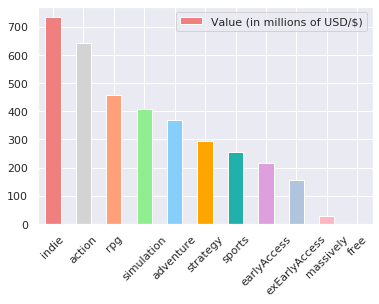

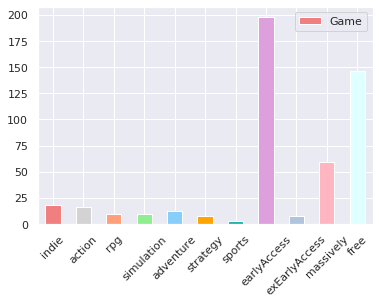

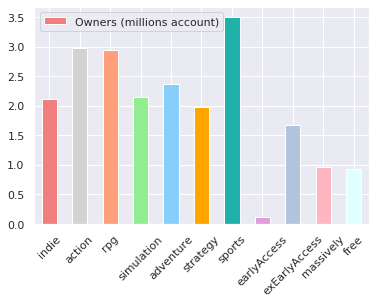

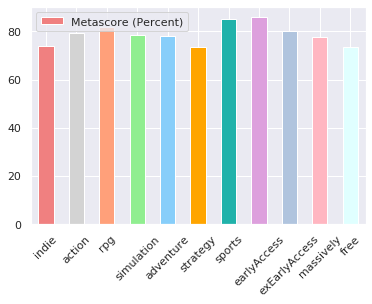

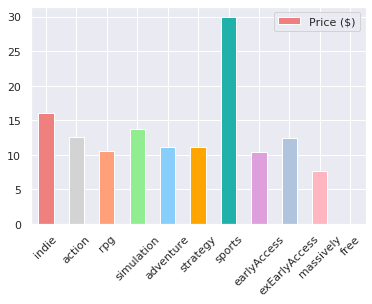

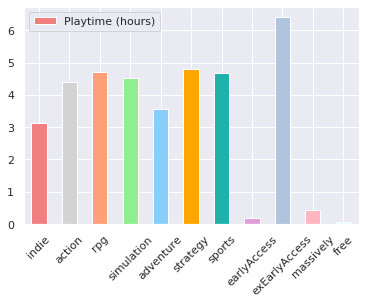

In [0]:
plot_tableOfYear(tableOf_year(2015))

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
indie,1013.97775,23,2.325000,78.608696,16.761739,4.080870
action,770.76180,30,2.044000,78.700000,13.200000,2.254333
strategy,688.33415,16,1.333438,81.250000,22.393125,3.114375
simulation,480.26900,14,1.757143,75.785714,19.804286,2.717143
rpg,389.87850,8,4.018750,81.250000,13.908750,2.852500
adventure,352.21365,16,2.524062,75.750000,9.849375,2.551875
exEarlyAccess,320.76650,8,4.793750,79.125000,10.258750,2.800000
earlyAccess,239.58705,468,0.070182,NaN,8.814439,0.060064
sports,91.85400,3,1.533333,85.000000,34.956667,6.540000
massively,87.14625,126,0.685317,69.250000,8.688182,0.111984


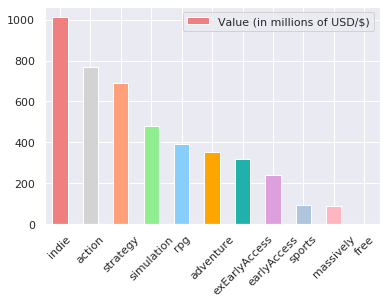

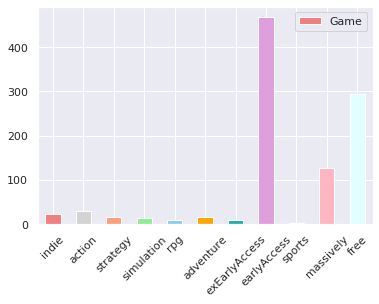

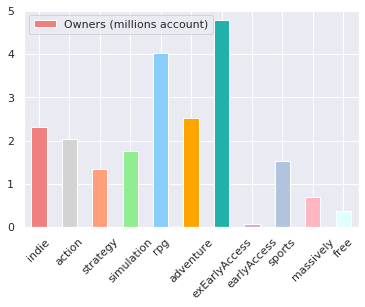

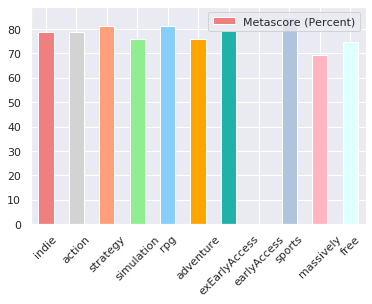

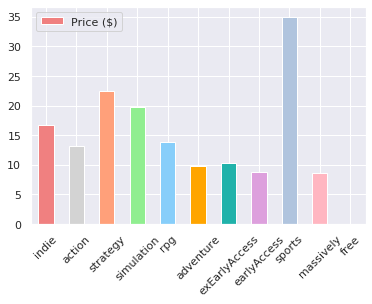

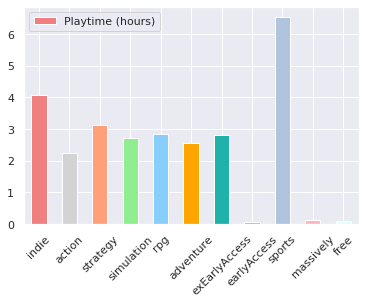

In [0]:
plot_tableOfYear(tableOf_year(2016))

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
action,2068.64090,34,3.453235,77.294118,22.485588,6.590294
adventure,1604.74765,20,5.211750,76.050000,17.620000,8.778500
massively,1435.32540,178,0.968315,76.777778,10.319067,1.149831
exEarlyAccess,1381.34500,7,12.928571,81.000000,12.525714,5.608571
indie,630.22225,21,0.965476,74.571429,20.228095,5.221905
rpg,466.80600,12,2.033333,79.250000,26.448333,13.669167
strategy,386.75350,11,1.786364,78.181818,14.649091,12.032727
simulation,178.38750,10,1.375000,76.800000,14.240000,14.310000
earlyAccess,167.90335,749,0.044933,NaN,8.444344,0.040921
sports,124.17400,3,0.866667,82.333333,37.323333,11.393333


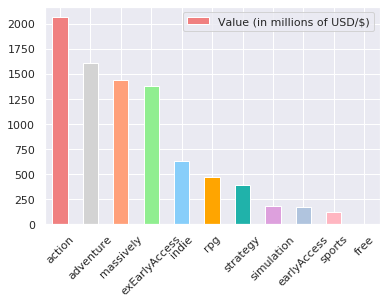

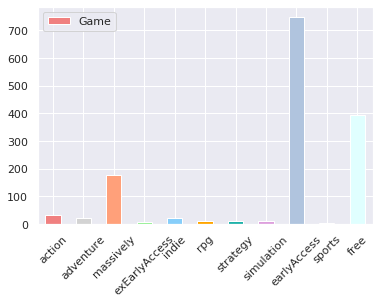

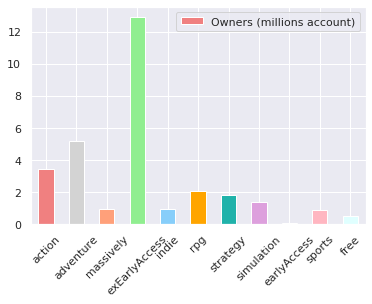

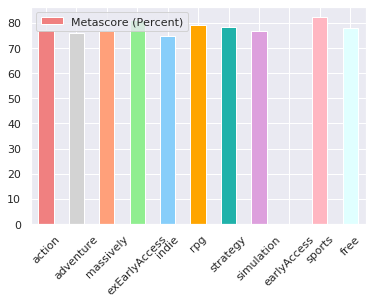

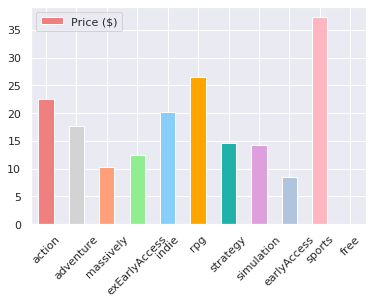

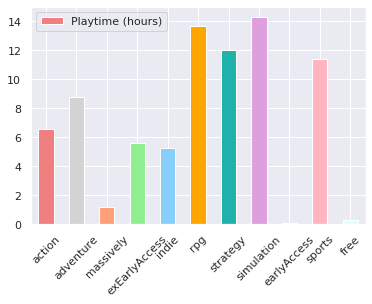

In [0]:
plot_tableOfYear(tableOf_year(2017))

,Value (in millions of USD/$),Game,Owners (millions account),Metascore (Percent),Price ($),Playtime (hours)
action,956.41895,25,1.423200,75.760000,19.037200,6.561200
indie,797.76440,27,1.057778,77.962963,24.249259,3.909259
massively,465.61295,239,0.255188,60.500000,8.636719,1.155732
exEarlyAccess,374.96850,7,2.371429,79.714286,18.364286,7.427143
adventure,364.85580,16,1.191875,74.187500,11.718750,8.191875
simulation,353.90165,17,0.924118,76.176471,23.945882,8.551176
earlyAccess,328.11895,1078,0.040867,70.666667,8.467561,0.104583
rpg,224.72050,5,2.090000,77.600000,17.680000,17.308000
strategy,201.27525,10,0.997500,77.300000,21.990000,10.449000
sports,117.72400,4,0.650000,81.500000,41.240000,5.772500


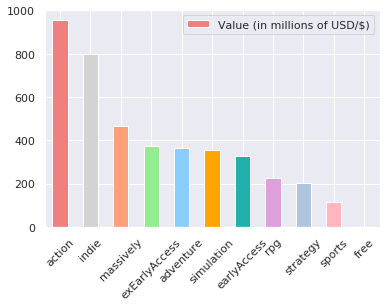

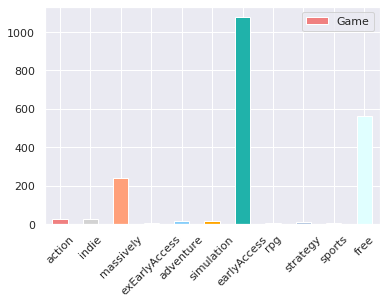

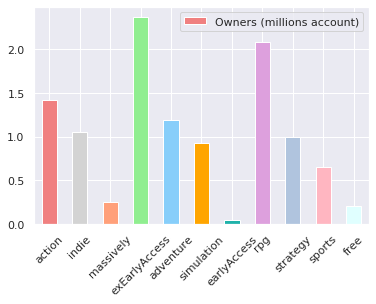

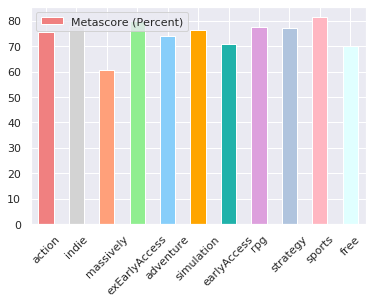

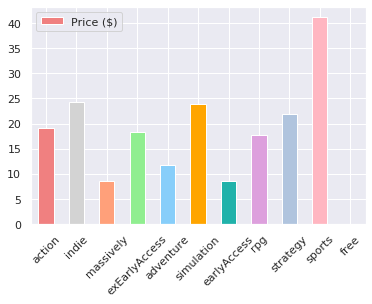

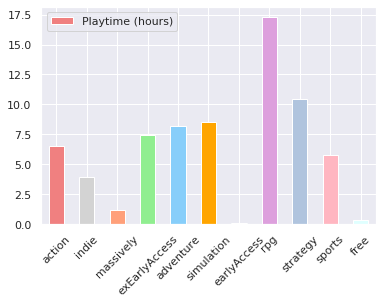

In [0]:
plot_tableOfYear(tableOf_year(2018))

**2.เราสามารถหา features ที่มีความสัมพันธ์หรือส่งผลต่อจำนวนผู้เล่นเกมในประเภทเกม Action**

นั่นคือ feature : Price, Playtime, value, Metascore

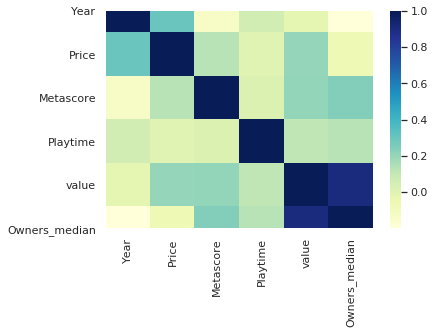

In [0]:
sns.heatmap(action_data.corr(), cmap = 'YlGnBu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95a3427080>,
      dtype=object)

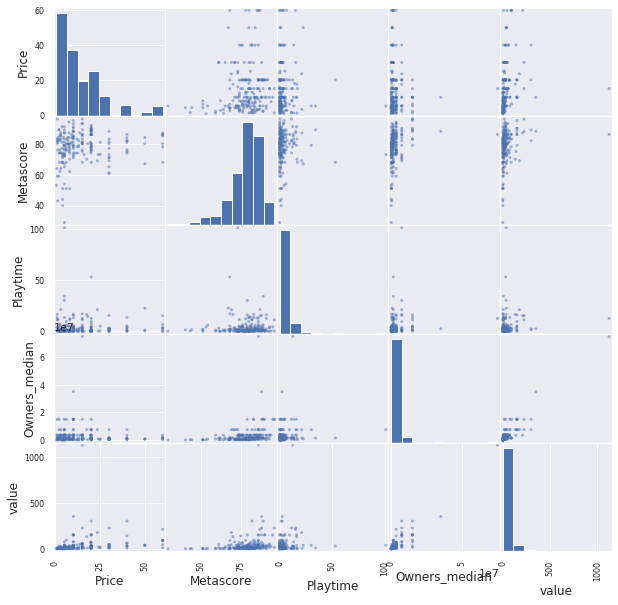

In [0]:
pd.plotting.scatter_matrix(action_data[['Price', 'Metascore', 'Playtime', 'Owners_median', 'value']], figsize=(10,10))

**3.เราสามารถทำนายหาจำนวนผู้เล่นในเกมนั้นๆได้ โดยใช้ Feaures ที่มีความสัมพันธ์กัน โดยใช้ Random forests Model**

In [0]:
# ตัวอย่างตารางแสดงค่าจากการ predictionn model
df_predict2.head()

,Game,Developer(s),Publisher(s),Year,Price,Metascore,Playtime,value,Owners_median,Predicted
AppId,,,,,,,,,,
59,Rocket League,"Psyonix, Inc.","Psyonix, Inc.",2015,19.99,86.0,6.43,299.850,15000000.0,15000000.0
145,Grim Dawn,Crate Entertainment,Crate Entertainment,2016,24.99,83.0,42.17,374.850,15000000.0,7500000.0
174,Terraria,Re-Logic,Re-Logic,2011,9.99,83.0,9.53,149.850,15000000.0,15000000.0
1326,The Tiny Bang Story,Colibri Games,Colibri Games,2011,4.99,63.0,0.05,74.850,15000000.0,15000000.0
132,Don't Starve Together,Klei Entertainment,Klei Entertainment,2016,14.99,83.0,2.44,112.425,7500000.0,15000000.0
